In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/vijay-0107/quantum_ml_classifier.git

Cloning into 'quantum_ml_classifier'...
remote: Enumerating objects: 5651, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 5651 (delta 17), reused 42 (delta 10), pack-reused 5602
Receiving objects: 100% (5651/5651), 77.74 MiB | 6.50 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (5651/5651), done.


In [ ]:
!pip install opencv-python

In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 15.9 MB/s eta 0:00:00


In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 74.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import cv2
import random
import pennylane as qml
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.circuit import Parameter
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pennylane.templates import RandomLayers
from google.colab.patches import cv2_imshow
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split
import torch

In [ ]:
SAVE_PATH_1 = "/content/quantum_ml_classifier/Encoded_data/size_28/"
SAVE_PATH_2 = "/content/drive/MyDrive/BTP/Encoded_data/size_28/"

In [ ]:
# Check if GPU is available, if not, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

print(device)


cuda


In [ ]:
train_color_images = np.load(SAVE_PATH_1 + "train_color_images.npy")
test_color_images = np.load(SAVE_PATH_1 + "test_color_images.npy")
train_label = np.load(SAVE_PATH_1 + "train_label.npy")
test_label = np.load(SAVE_PATH_1 + "test_label.npy")

#Calculate_Metrics

In [ ]:
def calculate_classification_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return f1, precision, recall, accuracy

def calculate_t_score_and_p_value(array1, array2):
    t_stat, p_value = ttest_rel(array1, array2)
    return t_stat, p_value

#BasicNN6

In [ ]:
def MyModel6():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN5

In [ ]:
def MyModel5():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN4

In [ ]:
def MyModel4():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN3

In [ ]:
def MyModel3():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN2

In [ ]:
def MyModel2():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN1

In [ ]:
def MyModel1():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(8, activation="tanh"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN

In [ ]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#CNN

In [ ]:
# Define your CNN model function
def MyCNNModel():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='tanh'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='tanh'),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='tanh'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#ResNET 50

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def MyResNet50Model(input_shape=(224, 224, 3), num_classes=1000):
    # Load ResNet50 architecture with pre-trained weights from ImageNet
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification head
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='tanh')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    # Combine the base model with custom classification head
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model


#SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def MySVMModel():
    """Initializes and returns a custom SVM model."""
    # Create an SVM classifier with a linear kernel
    svm_classifier = SVC(kernel='linear', probability=True)

    # Create a pipeline with scaling and the SVM classifier
    model = make_pipeline(StandardScaler(), svm_classifier)

    return model


#Comparision Graph

In [ ]:
def plot_comparison(q_history, c_history):
    plt.style.use("seaborn")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

    ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
    ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
    ax1.set_ylabel("Accuracy")
    ax1.set_ylim([0, 1])
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
    ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
    ax2.set_ylabel("Loss")
    ax2.set_ylim(top=2.5)
    ax2.set_xlabel("Epoch")
    ax2.legend()
    plt.tight_layout()
    plt.show()

#Classic


##Basic_NN6

In [ ]:
c_model_NN6 = MyModel6()

n_epochs = 75

c_history_NN6 = c_model_NN6.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 8s - loss: 1.0854 - accuracy: 0.4392 - val_loss: 0.7232 - val_accuracy: 0.6140 - 8s/epoch - 12ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9260 - accuracy: 0.4876 - val_loss: 0.7617 - val_accuracy: 0.4960 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.8274 - accuracy: 0.5416 - val_loss: 0.6832 - val_accuracy: 0.6940 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 3s - loss: 0.8792 - accuracy: 0.4984 - val_loss: 0.9445 - val_accuracy: 0.5520 - 3s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8935 - accuracy: 0.4920 - val_loss: 0.8135 - val_accuracy: 0.6120 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8523 - accuracy: 0.5052 - val_loss: 0.7647 - val_accuracy: 0.5780 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.7621 - accuracy: 0.5748 - val_loss: 0.6093 - val_accuracy: 0.6800 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8529 - accuracy: 0.5512 - val_loss: 0.7280 - val_accuracy: 0.6480 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 3s

In [ ]:
c_y_pred_NN6 = np.argmax(c_model_NN6.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN6, c_precision_NN6, c_recall_NN6, c_accuracy_NN6 = calculate_classification_metrics(test_label, c_y_pred_NN6)
print("F1 Score:", c_f1_NN6)
print("Precision:", c_precision_NN6)
print("Recall:", c_recall_NN6)
print("Accuracy:", c_accuracy_NN6)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.5915103597853761
Precision: 0.7062056336001674
Recall: 0.68
Accuracy: 0.68


##Basic_NN5

In [ ]:
c_model_NN5 = MyModel5()

n_epochs = 75

c_history_NN5 = c_model_NN5.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.3462 - accuracy: 0.3252 - val_loss: 0.9820 - val_accuracy: 0.3940 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 3s - loss: 0.9825 - accuracy: 0.4644 - val_loss: 0.8959 - val_accuracy: 0.5100 - 3s/epoch - 5ms/step
Epoch 3/75
625/625 - 3s - loss: 0.9482 - accuracy: 0.4792 - val_loss: 0.7599 - val_accuracy: 0.6200 - 3s/epoch - 6ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8155 - accuracy: 0.5020 - val_loss: 0.7702 - val_accuracy: 0.4260 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8354 - accuracy: 0.5124 - val_loss: 0.7898 - val_accuracy: 0.4200 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8697 - accuracy: 0.5044 - val_loss: 0.7730 - val_accuracy: 0.4200 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8557 - accuracy: 0.5040 - val_loss: 0.7889 - val_accuracy: 0.4180 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 3s - loss: 0.8008 - accuracy: 0.4992 - val_loss: 0.7475 - val_accuracy: 0.6760 - 3s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN5 = np.argmax(c_model_NN5.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN5, c_precision_NN5, c_recall_NN5, c_accuracy_NN5 = calculate_classification_metrics(test_label, c_y_pred_NN5)
print("F1 Score:", c_f1_NN5)
print("Precision:", c_precision_NN5)
print("Recall:", c_recall_NN5)
print("Accuracy:", c_accuracy_NN5)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.5762207957381823
Precision: 0.6638977674911557
Recall: 0.668
Accuracy: 0.668


##Basic_NN4

In [ ]:
c_model_NN4 = MyModel4()

n_epochs = 75

c_history_NN4 = c_model_NN4.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.9992 - accuracy: 0.4652 - val_loss: 0.6883 - val_accuracy: 0.6780 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.8402 - accuracy: 0.5252 - val_loss: 0.7226 - val_accuracy: 0.6780 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.8236 - accuracy: 0.5536 - val_loss: 0.8725 - val_accuracy: 0.4300 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.7537 - accuracy: 0.5936 - val_loss: 0.8978 - val_accuracy: 0.3880 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.7445 - accuracy: 0.5696 - val_loss: 0.6152 - val_accuracy: 0.6740 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8081 - accuracy: 0.5708 - val_loss: 0.6618 - val_accuracy: 0.6740 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 3s - loss: 0.7268 - accuracy: 0.6328 - val_loss: 0.7764 - val_accuracy: 0.6440 - 3s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.7730 - accuracy: 0.5824 - val_loss: 0.5867 - val_accuracy: 0.6840 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN4 = np.argmax(c_model_NN4.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN4, c_precision_NN4, c_recall_NN4, c_accuracy_NN4 = calculate_classification_metrics(test_label, c_y_pred_NN4)
print("F1 Score:", c_f1_NN4)
print("Precision:", c_precision_NN4)
print("Recall:", c_recall_NN4)
print("Accuracy:", c_accuracy_NN4)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.584228067257261
Precision: 0.8176595629735088
Recall: 0.68
Accuracy: 0.68


##Basic_NN3

In [ ]:
c_model_NN3 = MyModel3()

n_epochs = 75

c_history_NN3 = c_model_NN3.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.4035 - accuracy: 0.3208 - val_loss: 0.9282 - val_accuracy: 0.5380 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9926 - accuracy: 0.4636 - val_loss: 0.7670 - val_accuracy: 0.4420 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.9384 - accuracy: 0.4784 - val_loss: 1.0780 - val_accuracy: 0.3600 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.9018 - accuracy: 0.4748 - val_loss: 0.7433 - val_accuracy: 0.5740 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8514 - accuracy: 0.4788 - val_loss: 0.7080 - val_accuracy: 0.5800 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8713 - accuracy: 0.4808 - val_loss: 0.7355 - val_accuracy: 0.6000 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8640 - accuracy: 0.5524 - val_loss: 0.7935 - val_accuracy: 0.4280 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8312 - accuracy: 0.4944 - val_loss: 0.7229 - val_accuracy: 0.5640 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN3 = np.argmax(c_model_NN3.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN3, c_precision_NN3, c_recall_NN3, c_accuracy_NN3 = calculate_classification_metrics(test_label, c_y_pred_NN3)
print("F1 Score:", c_f1_NN3)
print("Precision:", c_precision_NN3)
print("Recall:", c_recall_NN3)
print("Accuracy:", c_accuracy_NN3)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.5366838424163067
Precision: 0.4987184615384615
Recall: 0.634
Accuracy: 0.634


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Basic_NN2

In [ ]:
c_model_NN2 = MyModel2()

n_epochs = 75

c_history_NN2 = c_model_NN2.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 5s - loss: 1.1309 - accuracy: 0.4424 - val_loss: 0.7898 - val_accuracy: 0.5960 - 5s/epoch - 9ms/step
Epoch 2/75
625/625 - 4s - loss: 0.8469 - accuracy: 0.5168 - val_loss: 0.7692 - val_accuracy: 0.4980 - 4s/epoch - 6ms/step
Epoch 3/75
625/625 - 3s - loss: 0.8049 - accuracy: 0.5512 - val_loss: 0.7105 - val_accuracy: 0.7220 - 3s/epoch - 4ms/step
Epoch 4/75
625/625 - 3s - loss: 0.7909 - accuracy: 0.5916 - val_loss: 0.6674 - val_accuracy: 0.7700 - 3s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.7179 - accuracy: 0.6424 - val_loss: 0.6088 - val_accuracy: 0.7940 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.7010 - accuracy: 0.6476 - val_loss: 0.5852 - val_accuracy: 0.7760 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6851 - accuracy: 0.6860 - val_loss: 0.5424 - val_accuracy: 0.7500 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6901 - accuracy: 0.6760 - val_loss: 0.6465 - val_accuracy: 0.8180 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN2 = np.argmax(c_model_NN2.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN2, c_precision_NN2, c_recall_NN2, c_accuracy_NN2 = calculate_classification_metrics(test_label, c_y_pred_NN2)
print("F1 Score:", c_f1_NN2)
print("Precision:", c_precision_NN2)
print("Recall:", c_recall_NN2)
print("Accuracy:", c_accuracy_NN2)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.7873203432901243
Precision: 0.8379895109430238
Recall: 0.804
Accuracy: 0.804


##Basic_NN1

In [ ]:
c_model_NN1 = MyModel1()

n_epochs = 75

c_history_NN1 = c_model_NN1.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 0.8768 - accuracy: 0.5612 - val_loss: 0.6811 - val_accuracy: 0.5120 - 3s/epoch - 4ms/step
Epoch 2/75
625/625 - 1s - loss: 0.7004 - accuracy: 0.6416 - val_loss: 0.6160 - val_accuracy: 0.6860 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.6716 - accuracy: 0.6744 - val_loss: 0.9312 - val_accuracy: 0.4500 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6624 - accuracy: 0.6904 - val_loss: 0.5722 - val_accuracy: 0.8040 - 2s/epoch - 2ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6047 - accuracy: 0.7180 - val_loss: 0.5204 - val_accuracy: 0.7820 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6000 - accuracy: 0.7228 - val_loss: 0.5703 - val_accuracy: 0.7920 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6369 - accuracy: 0.7052 - val_loss: 0.5400 - val_accuracy: 0.7920 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5923 - accuracy: 0.7120 - val_loss: 0.5136 - val_accuracy: 0.8400 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
c_y_pred_NN1 = np.argmax(c_model_NN1.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN1, c_precision_NN1, c_recall_NN1, c_accuracy_NN1 = calculate_classification_metrics(test_label, c_y_pred_NN1)
print("F1 Score:", c_f1_NN1)
print("Precision:", c_precision_NN1)
print("Recall:", c_recall_NN1)
print("Accuracy:", c_accuracy_NN1)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.7561342189300715
Precision: 0.7942112925385754
Recall: 0.762
Accuracy: 0.762


##Basic_NN

In [ ]:
c_model_NN = MyModel()

n_epochs = 75

c_history_NN = c_model_NN.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 0.8120 - accuracy: 0.5964 - val_loss: 0.7956 - val_accuracy: 0.5140 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 1s - loss: 0.6207 - accuracy: 0.6712 - val_loss: 0.5062 - val_accuracy: 0.7660 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.6037 - accuracy: 0.7040 - val_loss: 1.0340 - val_accuracy: 0.4440 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.5732 - accuracy: 0.7104 - val_loss: 0.6915 - val_accuracy: 0.6420 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.5399 - accuracy: 0.7292 - val_loss: 0.6255 - val_accuracy: 0.6520 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.5361 - accuracy: 0.7344 - val_loss: 0.5029 - val_accuracy: 0.7720 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.5897 - accuracy: 0.7104 - val_loss: 0.5904 - val_accuracy: 0.6920 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 0.5690 - accuracy: 0.7164 - val_loss: 0.7757 - val_accuracy: 0.6620 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN = np.argmax(c_model_NN.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN, c_precision_NN, c_recall_NN, c_accuracy_NN = calculate_classification_metrics(test_label, c_y_pred_NN)
print("F1 Score:", c_f1_NN)
print("Precision:", c_precision_NN)
print("Recall:", c_recall_NN)
print("Accuracy:", c_accuracy_NN)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.5917812844313397
Precision: 0.7578955700798837
Recall: 0.674
Accuracy: 0.674


##CNN

In [ ]:
c_model_CNN = MyCNNModel()

n_epochs = 75

c_history_CNN = c_model_CNN.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 6s - loss: 0.6749 - accuracy: 0.6532 - val_loss: 0.5109 - val_accuracy: 0.7180 - 6s/epoch - 9ms/step
Epoch 2/75
625/625 - 2s - loss: 0.5788 - accuracy: 0.7132 - val_loss: 0.4294 - val_accuracy: 0.8260 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.5386 - accuracy: 0.7348 - val_loss: 0.4572 - val_accuracy: 0.8340 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 3s - loss: 0.5912 - accuracy: 0.6884 - val_loss: 0.5214 - val_accuracy: 0.7300 - 3s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.5263 - accuracy: 0.7116 - val_loss: 0.6204 - val_accuracy: 0.7140 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.5730 - accuracy: 0.6908 - val_loss: 0.5326 - val_accuracy: 0.6940 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5718 - accuracy: 0.6652 - val_loss: 0.7317 - val_accuracy: 0.6600 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6102 - accuracy: 0.6608 - val_loss: 0.5374 - val_accuracy: 0.7200 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
c_y_pred_CNN = np.argmax(c_model_CNN.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 11ms/step


In [ ]:
# Calculate classification metrics
c_f1_CNN, c_precision_CNN, c_recall_CNN, c_accuracy_CNN = calculate_classification_metrics(test_label, c_y_pred_CNN)
print("F1 Score:", c_f1_CNN)
print("Precision:", c_precision_CNN)
print("Recall:", c_recall_CNN)
print("Accuracy:", c_accuracy_CNN)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.564359236544228
Precision: 0.5184717335486114
Recall: 0.656
Accuracy: 0.656


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##SVM

In [ ]:
# Reshape the input data to flatten the color channels
train_color_images_flattened = train_color_images.reshape(train_color_images.shape[0], -1)
test_color_images_flattened = test_color_images.reshape(test_color_images.shape[0], -1)

In [ ]:
c_svm_model = MySVMModel()

n_epochs = 75

c_svm_history = c_svm_model.fit(
    train_color_images_flattened,
    train_label
)

In [ ]:
c_y_pred_SVM = c_svm_model.predict(test_color_images_flattened)

In [ ]:
# Calculate classification metrics
c_f1_SVM, c_precision_SVM, c_recall_SVM, c_accuracy_SVM = calculate_classification_metrics(test_label, c_y_pred_SVM)
print("F1 Score:", c_f1_SVM)
print("Precision:", c_precision_SVM)
print("Recall:", c_recall_SVM)
print("Accuracy:", c_accuracy_SVM)

F1 Score: 0.7670459201497565
Precision: 0.791243446471342
Recall: 0.77
Accuracy: 0.77


#Angle_Encoded



##Basic_NN6



###Quantum

In [ ]:
q_train_color_images_angle = np.load(SAVE_PATH_1 + "q_train_color_images_angle.npy")
q_test_color_images_angle = np.load(SAVE_PATH_1 + "q_test_color_images_angle.npy")
q_train_label_angle = np.load(SAVE_PATH_1 + "q_train_label_angle.npy")
q_test_label_angle = np.load(SAVE_PATH_1 + "q_test_label_angle.npy")

In [ ]:
q_model_NN6_ang = MyModel6()

n_epochs = 75

q_history_NN6_ang = q_model_NN6_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.8292 - accuracy: 0.5920 - val_loss: 0.5892 - val_accuracy: 0.7100 - 4s/epoch - 7ms/step
Epoch 2/75
625/625 - 2s - loss: 0.6771 - accuracy: 0.6660 - val_loss: 0.5140 - val_accuracy: 0.7600 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 3s - loss: 0.6323 - accuracy: 0.7128 - val_loss: 0.4964 - val_accuracy: 0.8160 - 3s/epoch - 5ms/step
Epoch 4/75
625/625 - 2s - loss: 0.5762 - accuracy: 0.7596 - val_loss: 0.4741 - val_accuracy: 0.8060 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.5822 - accuracy: 0.7396 - val_loss: 0.4388 - val_accuracy: 0.8480 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.5326 - accuracy: 0.7768 - val_loss: 0.4365 - val_accuracy: 0.8420 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5914 - accuracy: 0.7192 - val_loss: 0.5876 - val_accuracy: 0.7400 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 3s - loss: 0.5667 - accuracy: 0.7396 - val_loss: 0.4256 - val_accuracy: 0.8260 - 3s/epoch - 5ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN6_ang = np.argmax(q_model_NN6_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN6, q_precision_ang_NN6, q_recall_ang_NN6, q_accuracy_ang_NN6 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN6_ang)
print("F1 Score:", q_f1_ang_NN6)
print("Precision:", q_precision_ang_NN6)
print("Recall:", q_recall_ang_NN6)
print("Accuracy:", q_accuracy_ang_NN6)

F1 Score: 0.8552387174833637
Precision: 0.8697496896497652
Recall: 0.856
Accuracy: 0.856


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


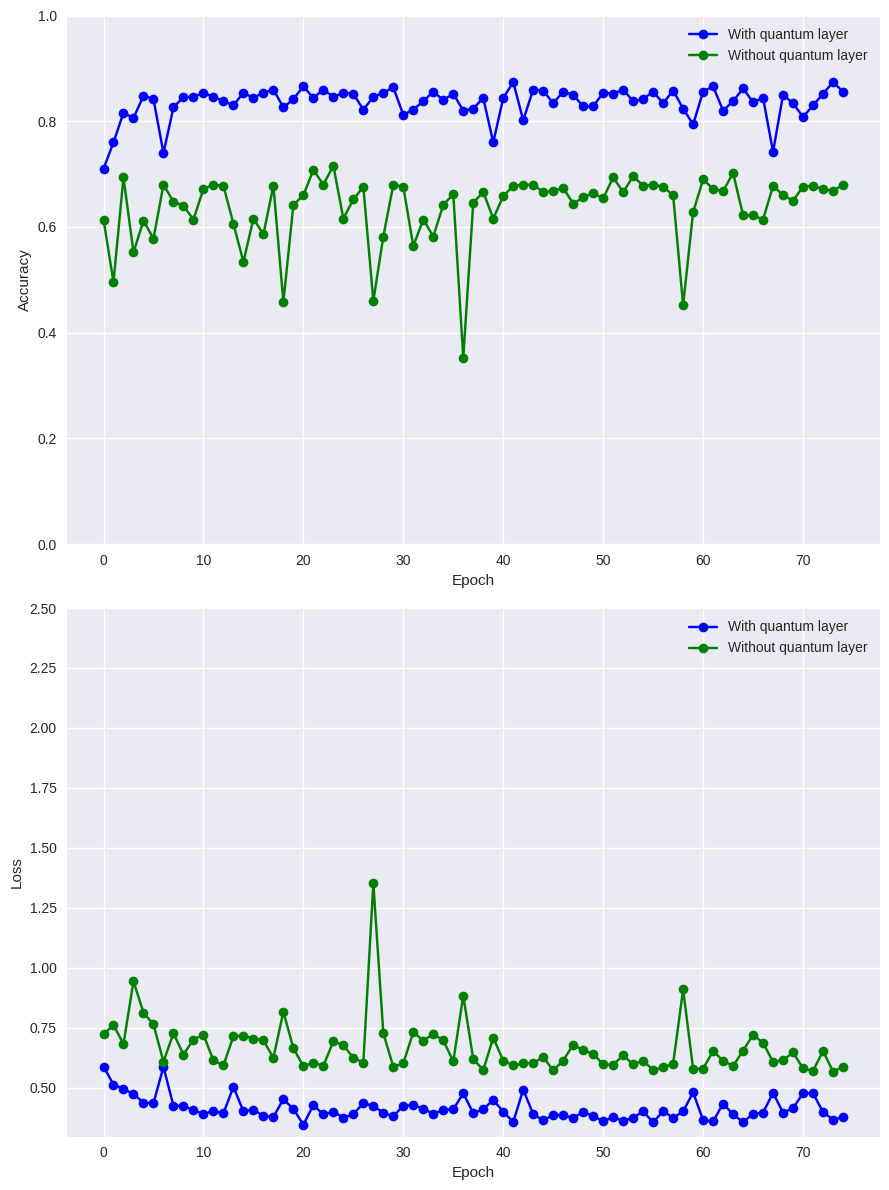

In [ ]:
plot_comparison(q_history_NN6_ang, c_history_NN6)

##Basic_NN5



###Quantum

In [ ]:
q_model_NN5_ang = MyModel5()

n_epochs = 75

q_history_NN5_ang = q_model_NN5_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 5s - loss: 0.8369 - accuracy: 0.6080 - val_loss: 0.6101 - val_accuracy: 0.7040 - 5s/epoch - 7ms/step
Epoch 2/75
625/625 - 2s - loss: 0.6772 - accuracy: 0.6752 - val_loss: 0.5334 - val_accuracy: 0.7440 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.6089 - accuracy: 0.6976 - val_loss: 0.4849 - val_accuracy: 0.7580 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6168 - accuracy: 0.7060 - val_loss: 0.4911 - val_accuracy: 0.7540 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 3s - loss: 0.5772 - accuracy: 0.7320 - val_loss: 0.5601 - val_accuracy: 0.7140 - 3s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6066 - accuracy: 0.7076 - val_loss: 0.4826 - val_accuracy: 0.7360 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5873 - accuracy: 0.7072 - val_loss: 0.4653 - val_accuracy: 0.7580 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5696 - accuracy: 0.7264 - val_loss: 0.5272 - val_accuracy: 0.7840 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN5_ang = np.argmax(q_model_NN5_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 1s 4ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN5, q_precision_ang_NN5, q_recall_ang_NN5, q_accuracy_ang_NN5 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN5_ang)
print("F1 Score:", q_f1_ang_NN5)
print("Precision:", q_precision_ang_NN5)
print("Recall:", q_recall_ang_NN5)
print("Accuracy:", q_accuracy_ang_NN5)

F1 Score: 0.8555833751359412
Precision: 0.882923344796774
Recall: 0.858
Accuracy: 0.858


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


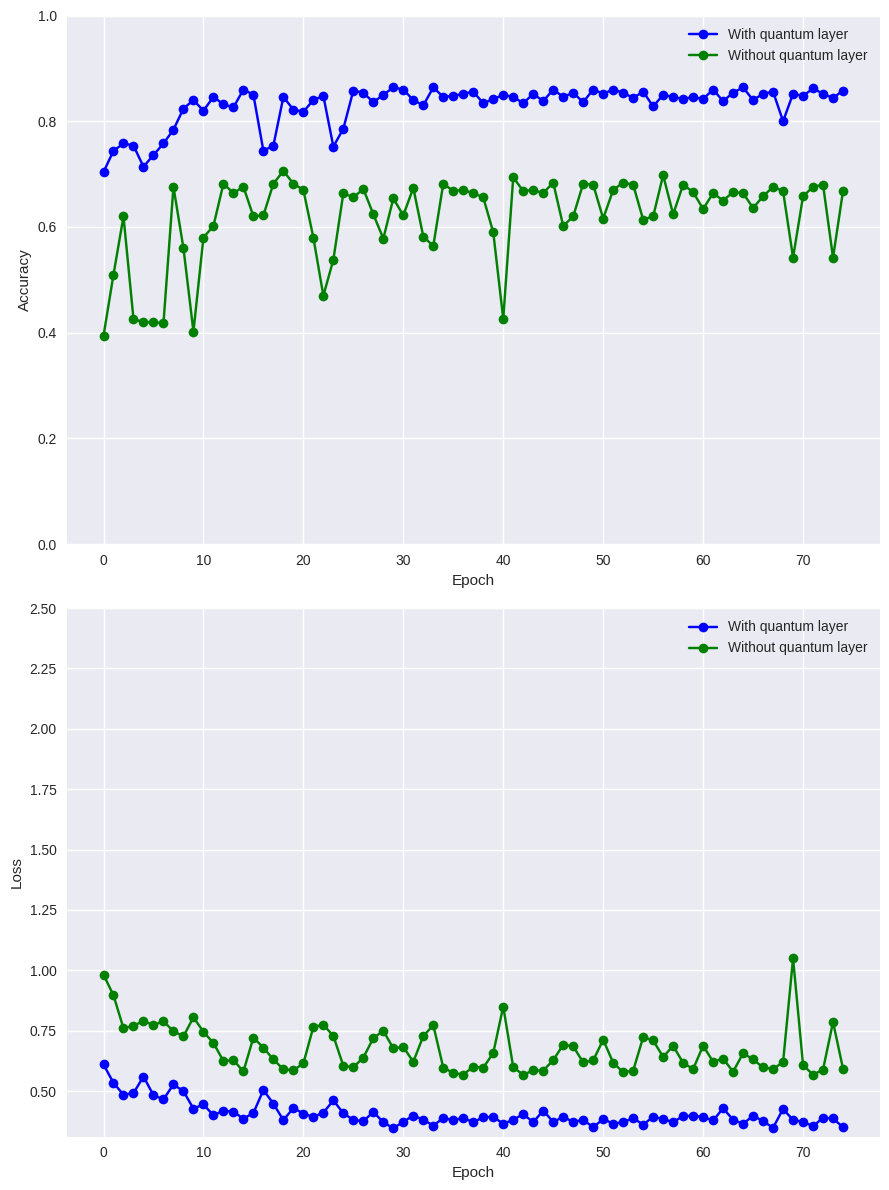

In [ ]:
plot_comparison(q_history_NN5_ang, c_history_NN5)

##Basic_NN4



###Quantum

In [ ]:
q_model_NN4_ang = MyModel4()

n_epochs = 75

q_history_NN4_ang = q_model_NN4_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.7497 - accuracy: 0.6300 - val_loss: 0.5275 - val_accuracy: 0.8300 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.6565 - accuracy: 0.6752 - val_loss: 0.5083 - val_accuracy: 0.7360 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.6358 - accuracy: 0.6864 - val_loss: 0.5013 - val_accuracy: 0.7960 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.5954 - accuracy: 0.7308 - val_loss: 0.4516 - val_accuracy: 0.8380 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.5706 - accuracy: 0.7460 - val_loss: 0.4177 - val_accuracy: 0.7780 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.5252 - accuracy: 0.7800 - val_loss: 0.3615 - val_accuracy: 0.8580 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5211 - accuracy: 0.7756 - val_loss: 0.3811 - val_accuracy: 0.8520 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5107 - accuracy: 0.7924 - val_loss: 0.3845 - val_accuracy: 0.8420 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN4_ang = np.argmax(q_model_NN4_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN4, q_precision_ang_NN4, q_recall_ang_NN4, q_accuracy_ang_NN4 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN4_ang)
print("F1 Score:", q_f1_ang_NN4)
print("Precision:", q_precision_ang_NN4)
print("Recall:", q_recall_ang_NN4)
print("Accuracy:", q_accuracy_ang_NN4)

F1 Score: 0.8556509373927169
Precision: 0.8809437396580254
Recall: 0.858
Accuracy: 0.858


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


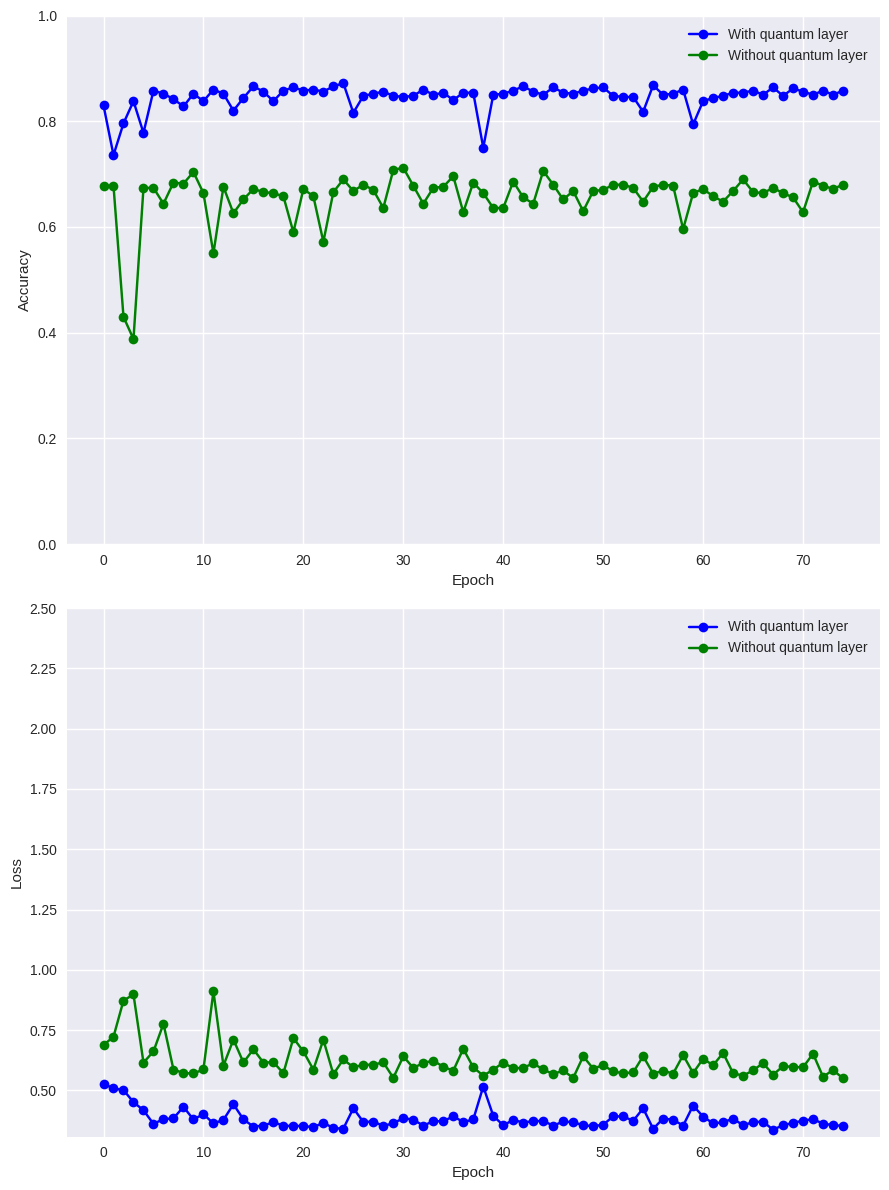

In [ ]:
plot_comparison(q_history_NN4_ang, c_history_NN4)

##Basic_NN3



###Quantum

In [ ]:
q_model_NN3_ang = MyModel3()

n_epochs = 75

q_history_NN3_ang = q_model_NN3_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.8411 - accuracy: 0.5928 - val_loss: 0.5631 - val_accuracy: 0.7960 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 3s - loss: 0.6702 - accuracy: 0.7016 - val_loss: 0.4870 - val_accuracy: 0.8300 - 3s/epoch - 5ms/step
Epoch 3/75
625/625 - 2s - loss: 0.5942 - accuracy: 0.7472 - val_loss: 0.4217 - val_accuracy: 0.8380 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.5458 - accuracy: 0.7708 - val_loss: 0.4376 - val_accuracy: 0.8400 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.5566 - accuracy: 0.7672 - val_loss: 0.3832 - val_accuracy: 0.8440 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.4987 - accuracy: 0.7988 - val_loss: 0.4135 - val_accuracy: 0.8220 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5211 - accuracy: 0.7884 - val_loss: 0.4063 - val_accuracy: 0.8500 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5160 - accuracy: 0.7848 - val_loss: 0.3772 - val_accuracy: 0.8460 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN3_ang = np.argmax(q_model_NN3_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN3, q_precision_ang_NN3, q_recall_ang_NN3, q_accuracy_ang_NN3 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN3_ang)
print("F1 Score:", q_f1_ang_NN3)
print("Precision:", q_precision_ang_NN3)
print("Recall:", q_recall_ang_NN3)
print("Accuracy:", q_accuracy_ang_NN3)

F1 Score: 0.8495161112314992
Precision: 0.8758022184187132
Recall: 0.852
Accuracy: 0.852


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


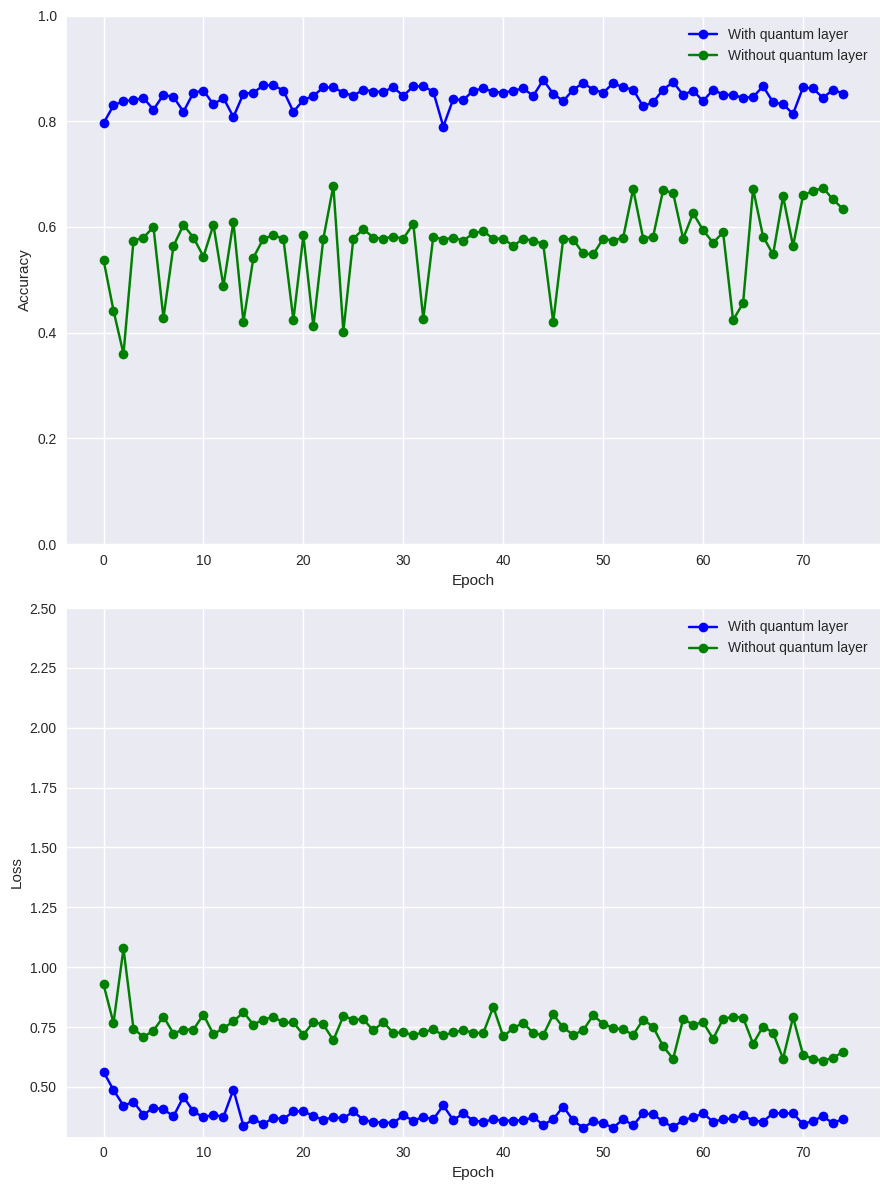

In [ ]:
plot_comparison(q_history_NN3_ang, c_history_NN3)

##Basic_NN2



###Quantum

In [ ]:
q_model_NN2_ang = MyModel2()

n_epochs = 75

q_history_NN2_ang = q_model_NN2_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 6s - loss: 0.8002 - accuracy: 0.6088 - val_loss: 0.6679 - val_accuracy: 0.6700 - 6s/epoch - 9ms/step
Epoch 2/75
625/625 - 3s - loss: 0.6644 - accuracy: 0.6924 - val_loss: 0.5238 - val_accuracy: 0.8400 - 3s/epoch - 5ms/step
Epoch 3/75
625/625 - 3s - loss: 0.6303 - accuracy: 0.7100 - val_loss: 0.4944 - val_accuracy: 0.8400 - 3s/epoch - 5ms/step
Epoch 4/75
625/625 - 4s - loss: 0.5953 - accuracy: 0.7320 - val_loss: 0.4624 - val_accuracy: 0.8580 - 4s/epoch - 6ms/step
Epoch 5/75
625/625 - 3s - loss: 0.6371 - accuracy: 0.7168 - val_loss: 0.4504 - val_accuracy: 0.8500 - 3s/epoch - 5ms/step
Epoch 6/75
625/625 - 3s - loss: 0.5765 - accuracy: 0.7540 - val_loss: 0.4952 - val_accuracy: 0.8080 - 3s/epoch - 4ms/step
Epoch 7/75
625/625 - 3s - loss: 0.5626 - accuracy: 0.7564 - val_loss: 0.4659 - val_accuracy: 0.8320 - 3s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5395 - accuracy: 0.7764 - val_loss: 0.4222 - val_accuracy: 0.8420 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN2_ang = np.argmax(q_model_NN2_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN2, q_precision_ang_NN2, q_recall_ang_NN2, q_accuracy_ang_NN2 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN2_ang)
print("F1 Score:", q_f1_ang_NN2)
print("Precision:", q_precision_ang_NN2)
print("Recall:", q_recall_ang_NN2)
print("Accuracy:", q_accuracy_ang_NN2)

F1 Score: 0.8512859655889096
Precision: 0.8785198943304207
Recall: 0.854
Accuracy: 0.854


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


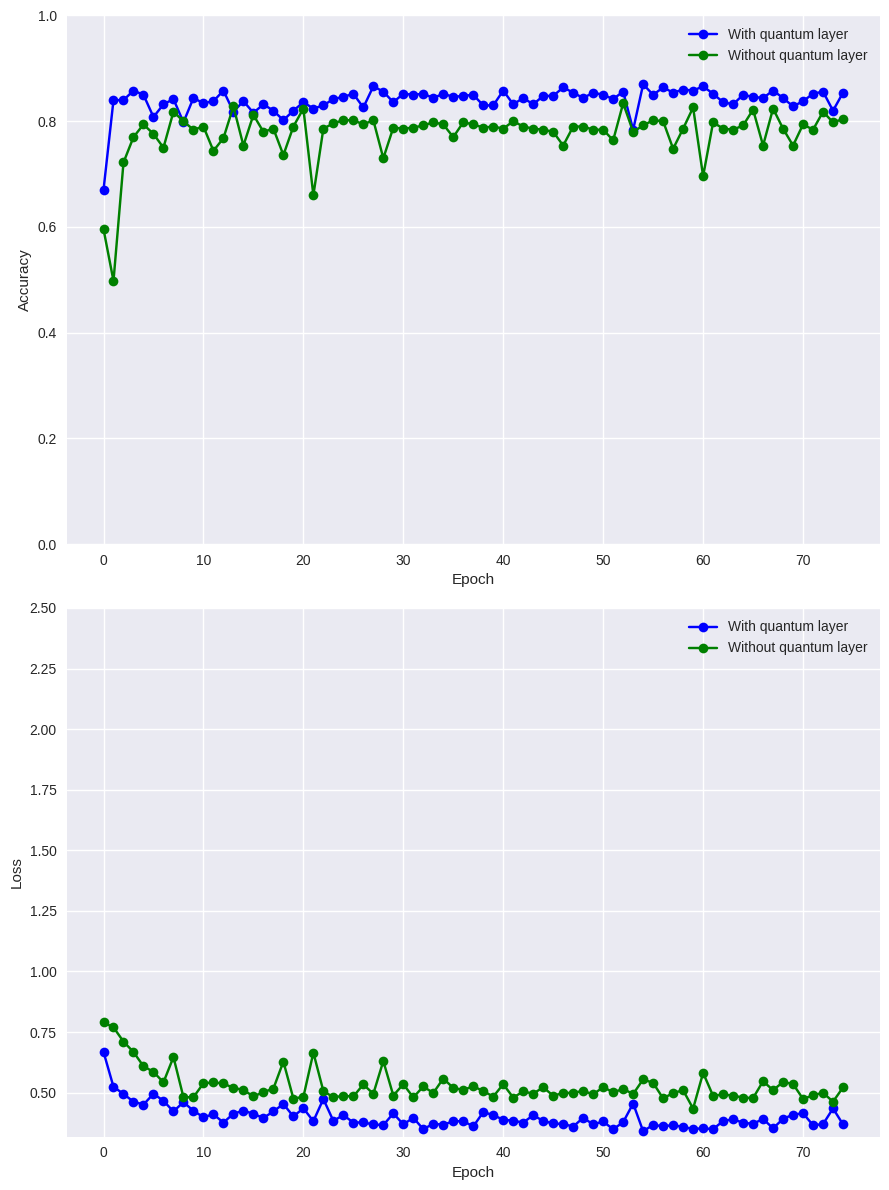

In [ ]:
plot_comparison(q_history_NN2_ang, c_history_NN2)

##Basic_NN1



###Quantum

In [ ]:
q_model_NN1_ang = MyModel1()

n_epochs = 75

q_history_NN1_ang = q_model_NN1_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 0.7753 - accuracy: 0.6428 - val_loss: 0.6868 - val_accuracy: 0.7100 - 3s/epoch - 4ms/step
Epoch 2/75
625/625 - 2s - loss: 0.6650 - accuracy: 0.7156 - val_loss: 0.5833 - val_accuracy: 0.8040 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.6289 - accuracy: 0.7332 - val_loss: 0.5561 - val_accuracy: 0.7520 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.5954 - accuracy: 0.7484 - val_loss: 0.5214 - val_accuracy: 0.8340 - 2s/epoch - 2ms/step
Epoch 5/75
625/625 - 2s - loss: 0.5664 - accuracy: 0.7724 - val_loss: 0.5856 - val_accuracy: 0.6960 - 2s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.5711 - accuracy: 0.7572 - val_loss: 0.4769 - val_accuracy: 0.8340 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.5536 - accuracy: 0.7624 - val_loss: 0.4548 - val_accuracy: 0.8440 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 0.5382 - accuracy: 0.7804 - val_loss: 0.5080 - val_accuracy: 0.8280 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN1_ang = np.argmax(q_model_NN1_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 6ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN1, q_precision_ang_NN1, q_recall_ang_NN1, q_accuracy_ang_NN1 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN1_ang)
print("F1 Score:", q_f1_ang_NN1)
print("Precision:", q_precision_ang_NN1)
print("Recall:", q_recall_ang_NN1)
print("Accuracy:", q_accuracy_ang_NN1)

F1 Score: 0.8438286362407444
Precision: 0.8646390145801911
Recall: 0.846
Accuracy: 0.846


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


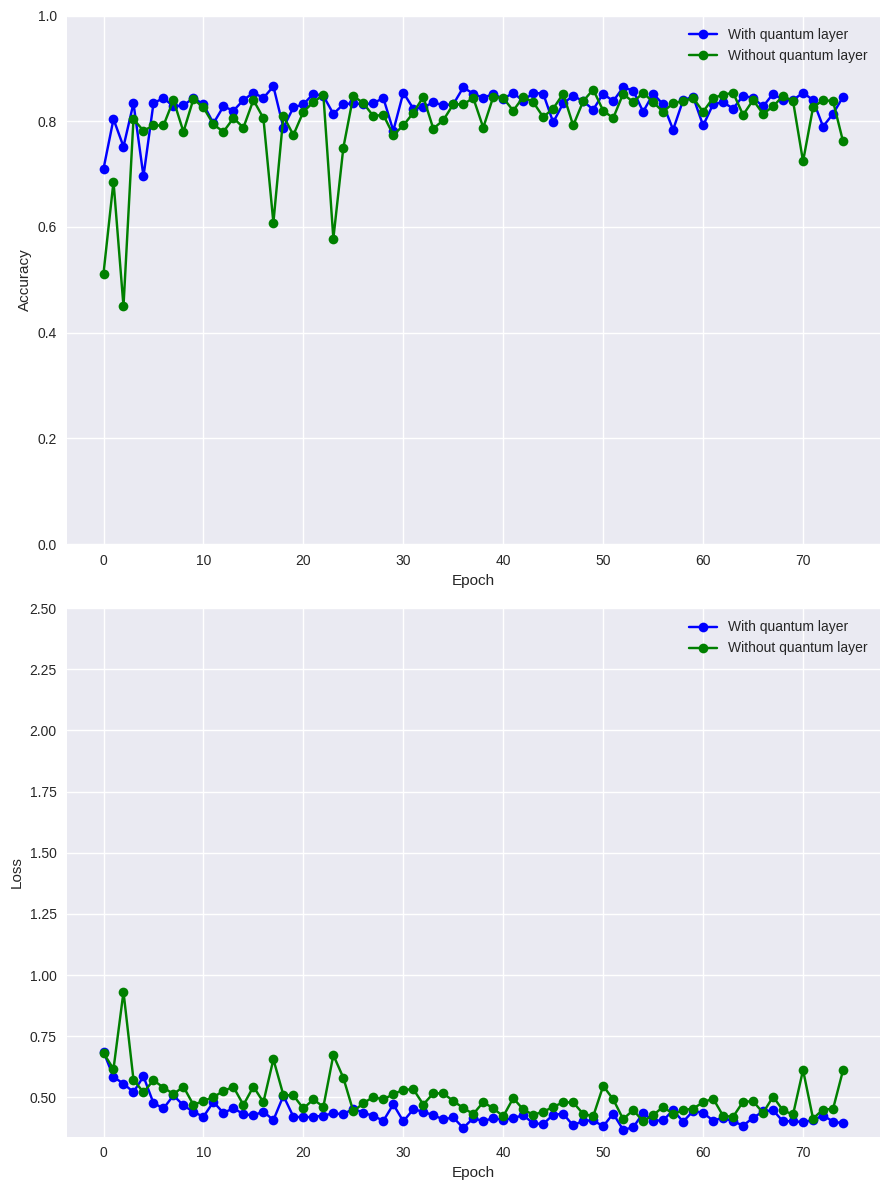

In [ ]:
plot_comparison(q_history_NN1_ang, c_history_NN1)

##Basic_NN



###Quantum

In [ ]:
q_model_NN_ang = MyModel()

n_epochs = 75

q_history_NN_ang = q_model_NN_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 0.7609 - accuracy: 0.6528 - val_loss: 0.6785 - val_accuracy: 0.7040 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 1s - loss: 0.7547 - accuracy: 0.6748 - val_loss: 0.7353 - val_accuracy: 0.6500 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.6940 - accuracy: 0.6896 - val_loss: 0.6917 - val_accuracy: 0.7060 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.6533 - accuracy: 0.7168 - val_loss: 0.6834 - val_accuracy: 0.7140 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.6397 - accuracy: 0.7280 - val_loss: 0.6266 - val_accuracy: 0.7740 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.6502 - accuracy: 0.7268 - val_loss: 0.5721 - val_accuracy: 0.7600 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.6296 - accuracy: 0.7344 - val_loss: 0.5803 - val_accuracy: 0.7720 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6269 - accuracy: 0.7336 - val_loss: 0.6185 - val_accuracy: 0.7520 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN_ang = np.argmax(q_model_NN_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN, q_precision_ang_NN, q_recall_ang_NN, q_accuracy_ang_NN = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN_ang)
print("F1 Score:", q_f1_ang_NN)
print("Precision:", q_precision_ang_NN)
print("Recall:", q_recall_ang_NN)
print("Accuracy:", q_accuracy_ang_NN)

F1 Score: 0.8133859739873699
Precision: 0.8251130589367042
Recall: 0.812
Accuracy: 0.812


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


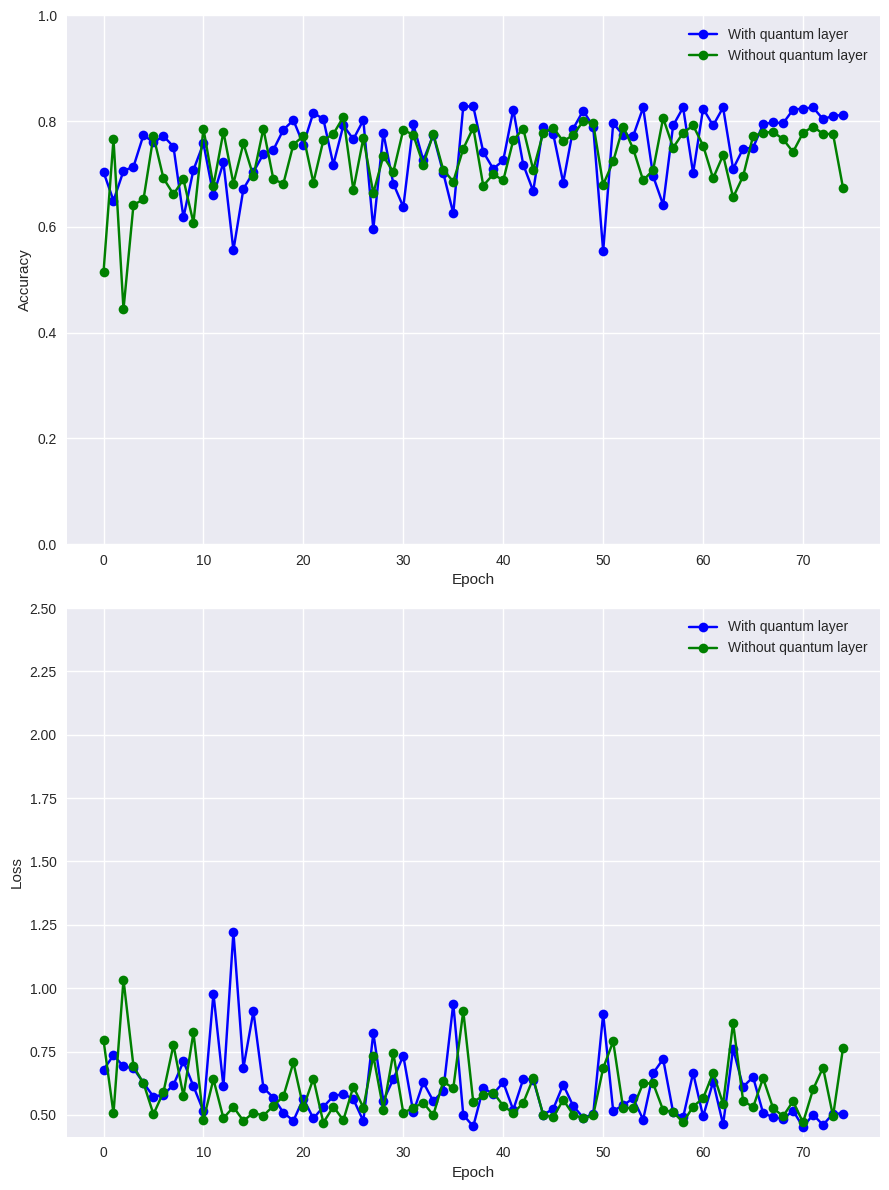

In [ ]:
plot_comparison(q_history_NN_ang, c_history_NN)

##CNN

###Quantum

In [ ]:
q_CNN_model_ang = MyCNNModel()

n_epochs = 75

q_history_CNN_ang = q_CNN_model_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.6982 - accuracy: 0.6524 - val_loss: 1.0348 - val_accuracy: 0.5280 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.5500 - accuracy: 0.7244 - val_loss: 0.4844 - val_accuracy: 0.7280 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.5236 - accuracy: 0.7480 - val_loss: 0.5160 - val_accuracy: 0.7480 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.5111 - accuracy: 0.7728 - val_loss: 0.4254 - val_accuracy: 0.8660 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.4601 - accuracy: 0.7908 - val_loss: 0.3836 - val_accuracy: 0.8800 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.4150 - accuracy: 0.8220 - val_loss: 0.3123 - val_accuracy: 0.8880 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.4110 - accuracy: 0.8324 - val_loss: 0.4943 - val_accuracy: 0.8040 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.3953 - accuracy: 0.8432 - val_loss: 0.3730 - val_accuracy: 0.8620 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
q_y_pred_CNN_ang = np.argmax(q_CNN_model_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_CNN_ang, q_precision_CNN_ang, q_recall_CNN_ang, q_accuracy_CNN_ang = calculate_classification_metrics(q_test_label_angle, q_y_pred_CNN_ang)
print("F1 Score:", q_f1_CNN_ang)
print("Precision:", q_precision_CNN_ang)
print("Recall:", q_recall_CNN_ang)
print("Accuracy:", q_accuracy_CNN_ang)

F1 Score: 0.9461590191930506
Precision: 0.9468579839565755
Recall: 0.946
Accuracy: 0.946


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


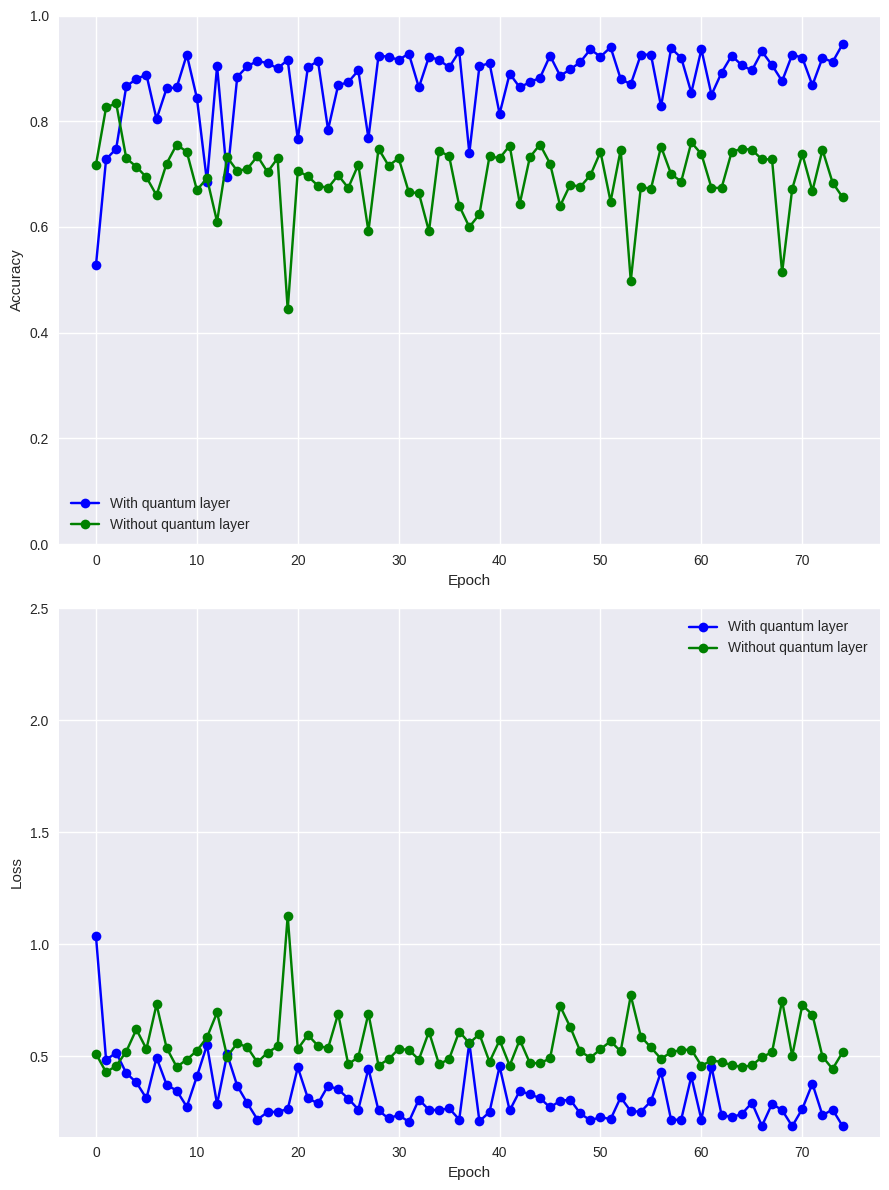

In [ ]:
plot_comparison(q_history_CNN_ang, c_history_CNN)

##SVM

###Quantum

In [ ]:
# Reshape the input data to flatten the color channels
q_train_color_images_angle_flattened = q_train_color_images_angle.reshape(q_train_color_images_angle.shape[0], -1)
q_test_color_images_angle_flattened = q_test_color_images_angle.reshape(q_test_color_images_angle.shape[0], -1)

In [ ]:
q_svm_model_ang = MySVMModel()

n_epochs = 75

q_svm_history_ang = q_svm_model_ang.fit(
    q_train_color_images_angle_flattened,
    q_train_label_angle
)

In [ ]:
q_y_predSVM_ang = q_svm_model_ang.predict(q_test_color_images_angle_flattened)

In [ ]:
# Calculate classification metrics
q_f1_SVM_ang, q_precision_SVM_ang, q_recall_SVM_ang, q_accuracy_SVM_ang = calculate_classification_metrics(q_test_label_angle, q_y_predSVM_ang)
print("F1 Score:", q_f1_SVM_ang)
print("Precision:", q_precision_SVM_ang)
print("Recall:", q_recall_SVM_ang)
print("Accuracy:", q_accuracy_SVM_ang)

F1 Score: 0.7310162165975446
Precision: 0.7565986257148523
Recall: 0.736
Accuracy: 0.736


#Amplitude_Encoded

##Basic_NN6

###Quantum

In [ ]:
q_train_color_images_amp = np.load(SAVE_PATH_1 + "q_train_color_images_amplitude.npy")
q_test_color_images_amp = np.load(SAVE_PATH_1 + "q_test_color_images_amplitude.npy")
q_train_label_amp = np.load(SAVE_PATH_1 + "q_train_label_amplitude.npy")
q_test_label_amp = np.load(SAVE_PATH_1 + "q_test_label_amplitude.npy")

In [ ]:
q_model_NN6_amp = MyModel6()

n_epochs = 75

q_history_NN6_amp = q_model_NN6_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 5s - loss: 1.4904 - accuracy: 0.2640 - val_loss: 1.3679 - val_accuracy: 0.2960 - 5s/epoch - 8ms/step
Epoch 2/75
625/625 - 2s - loss: 1.4443 - accuracy: 0.2564 - val_loss: 1.3643 - val_accuracy: 0.2880 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 3s - loss: 1.3434 - accuracy: 0.3308 - val_loss: 0.9751 - val_accuracy: 0.5740 - 3s/epoch - 5ms/step
Epoch 4/75
625/625 - 2s - loss: 1.1178 - accuracy: 0.4336 - val_loss: 0.8216 - val_accuracy: 0.5560 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 1.0038 - accuracy: 0.4668 - val_loss: 0.8185 - val_accuracy: 0.5720 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.9831 - accuracy: 0.4736 - val_loss: 0.8548 - val_accuracy: 0.5800 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.9642 - accuracy: 0.4692 - val_loss: 0.9092 - val_accuracy: 0.5300 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 3s - loss: 0.9427 - accuracy: 0.4556 - val_loss: 0.7969 - val_accuracy: 0.5620 - 3s/epoch - 5ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN6_amp = np.argmax(q_model_NN6_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN6, q_precision_amp_NN6, q_recall_amp_NN6, q_accuracy_amp_NN6 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN6_amp)
print("F1 Score:", q_f1_amp_NN6)
print("Precision:", q_precision_amp_NN6)
print("Recall:", q_recall_amp_NN6)
print("Accuracy:", q_accuracy_amp_NN6)

F1 Score: 0.12879503105590062
Precision: 0.08294399999999999
Recall: 0.288
Accuracy: 0.288


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


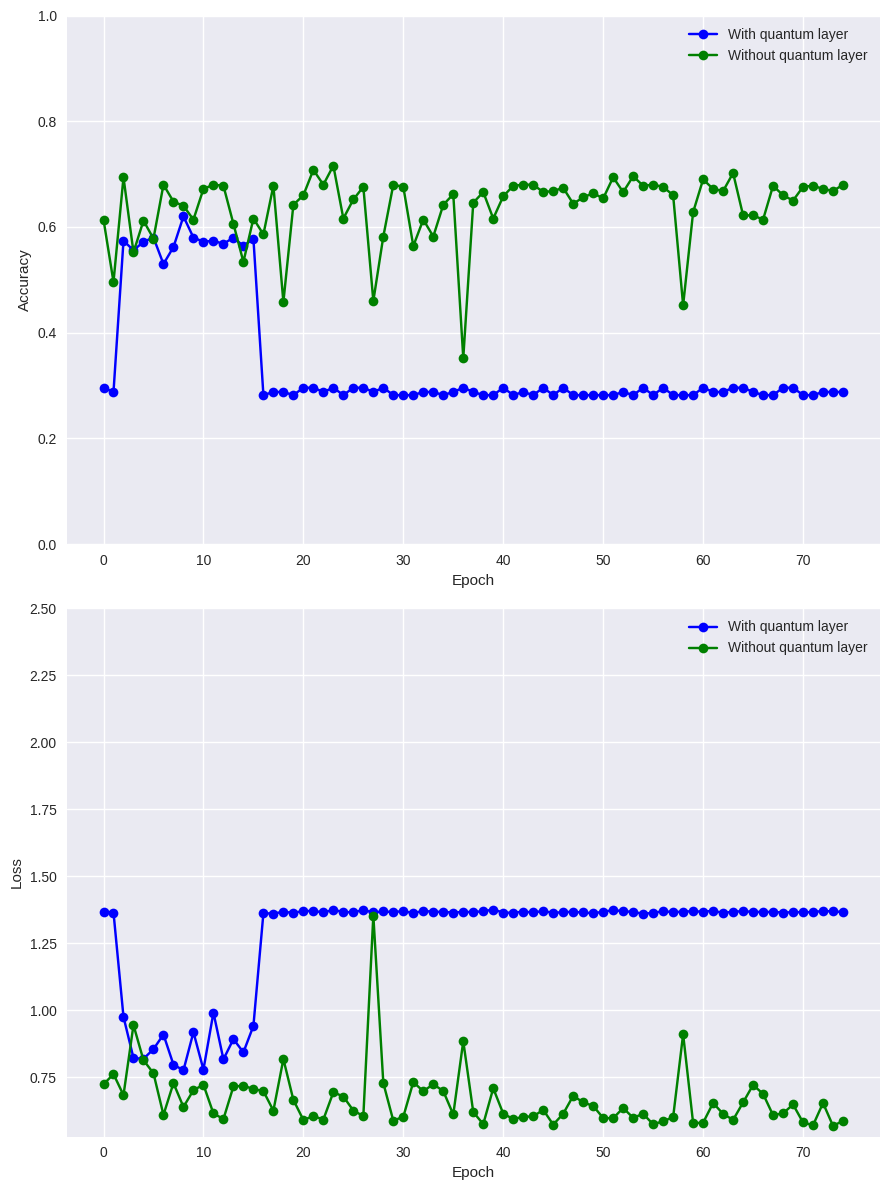

In [ ]:
plot_comparison(q_history_NN6_amp, c_history_NN6)

##Basic_NN5

###Quantum

In [ ]:
q_model_NN5_amp = MyModel5()

n_epochs = 75

q_history_NN5_amp = q_model_NN5_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4829 - accuracy: 0.2624 - val_loss: 1.3838 - val_accuracy: 0.2820 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 3s - loss: 1.4356 - accuracy: 0.2496 - val_loss: 1.3755 - val_accuracy: 0.2880 - 3s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 1.4127 - accuracy: 0.2604 - val_loss: 1.3790 - val_accuracy: 0.2960 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 1.4065 - accuracy: 0.2464 - val_loss: 1.3717 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3960 - accuracy: 0.2660 - val_loss: 1.3863 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3922 - accuracy: 0.2584 - val_loss: 1.3663 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3919 - accuracy: 0.2624 - val_loss: 1.3660 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 3s - loss: 1.3904 - accuracy: 0.2612 - val_loss: 1.3665 - val_accuracy: 0.2820 - 3s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN5_amp = np.argmax(q_model_NN5_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN5, q_precision_amp_NN5, q_recall_amp_NN5, q_accuracy_amp_NN5 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN5_amp)
print("F1 Score:", q_f1_amp_NN5)
print("Precision:", q_precision_amp_NN5)
print("Recall:", q_recall_amp_NN5)
print("Accuracy:", q_accuracy_amp_NN5)

F1 Score: 0.12879503105590062
Precision: 0.08294399999999999
Recall: 0.288
Accuracy: 0.288


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


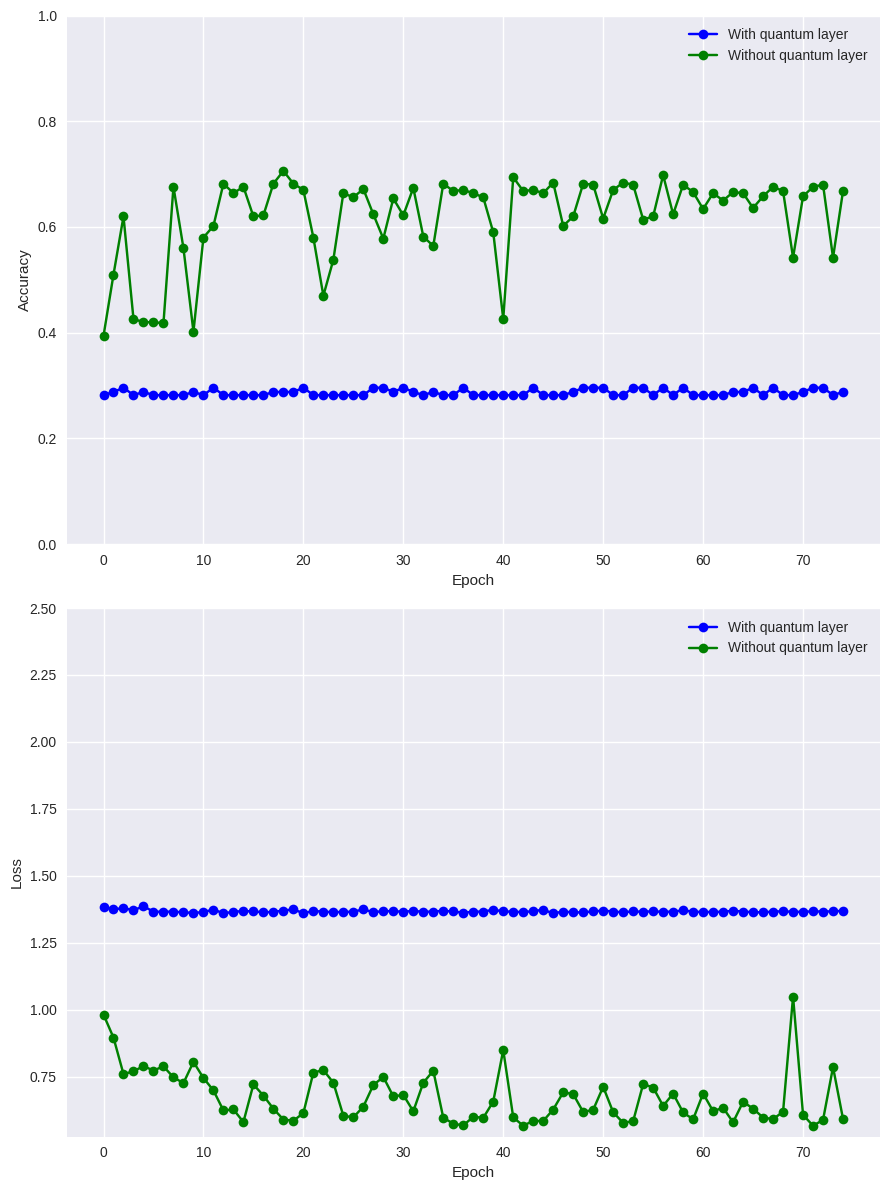

In [ ]:
plot_comparison(q_history_NN5_amp, c_history_NN5)

##Basic_NN4

###Quantum

In [ ]:
q_model_NN4_amp = MyModel4()

n_epochs = 75

q_history_NN4_amp = q_model_NN4_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.5020 - accuracy: 0.2612 - val_loss: 1.3688 - val_accuracy: 0.2880 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 1.4569 - accuracy: 0.2500 - val_loss: 1.3706 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.4239 - accuracy: 0.2612 - val_loss: 1.3538 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.4254 - accuracy: 0.2580 - val_loss: 1.3466 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.4038 - accuracy: 0.2640 - val_loss: 1.3454 - val_accuracy: 0.2960 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3934 - accuracy: 0.2460 - val_loss: 1.3486 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3930 - accuracy: 0.2540 - val_loss: 1.3744 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3902 - accuracy: 0.2492 - val_loss: 1.3830 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN4_amp = np.argmax(q_model_NN4_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN4, q_precision_amp_NN4, q_recall_amp_NN4, q_accuracy_amp_NN4 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN4_amp)
print("F1 Score:", q_f1_amp_NN4)
print("Precision:", q_precision_amp_NN4)
print("Recall:", q_recall_amp_NN4)
print("Accuracy:", q_accuracy_amp_NN4)

F1 Score: 0.13520987654320987
Precision: 0.087616
Recall: 0.296
Accuracy: 0.296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


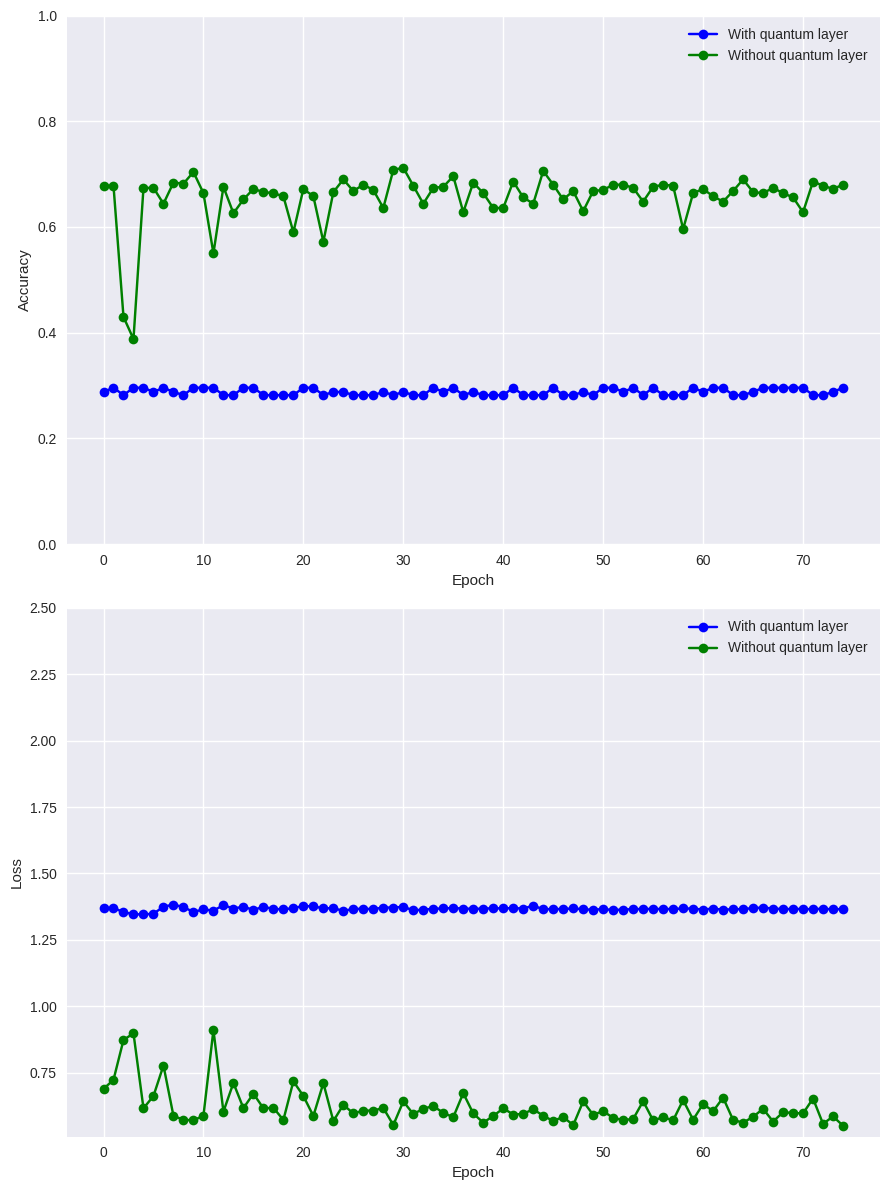

In [ ]:
plot_comparison(q_history_NN4_amp, c_history_NN4)

##Basic_NN3

###Quantum

In [ ]:
q_model_NN3_amp = MyModel3()

n_epochs = 75

q_history_NN3_amp = q_model_NN3_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.2811 - accuracy: 0.3388 - val_loss: 0.9124 - val_accuracy: 0.4380 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 1.2741 - accuracy: 0.3468 - val_loss: 1.3929 - val_accuracy: 0.2840 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.4277 - accuracy: 0.2740 - val_loss: 1.3766 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.4161 - accuracy: 0.2504 - val_loss: 1.3642 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.4036 - accuracy: 0.2508 - val_loss: 1.3731 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3968 - accuracy: 0.2672 - val_loss: 1.3625 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3970 - accuracy: 0.2456 - val_loss: 1.3722 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3915 - accuracy: 0.2544 - val_loss: 1.3754 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN3_amp = np.argmax(q_model_NN3_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN3, q_precision_amp_NN3, q_recall_amp_NN3, q_accuracy_amp_NN3 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN3_amp)
print("F1 Score:", q_f1_amp_NN3)
print("Precision:", q_precision_amp_NN3)
print("Recall:", q_recall_amp_NN3)
print("Accuracy:", q_accuracy_amp_NN3)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


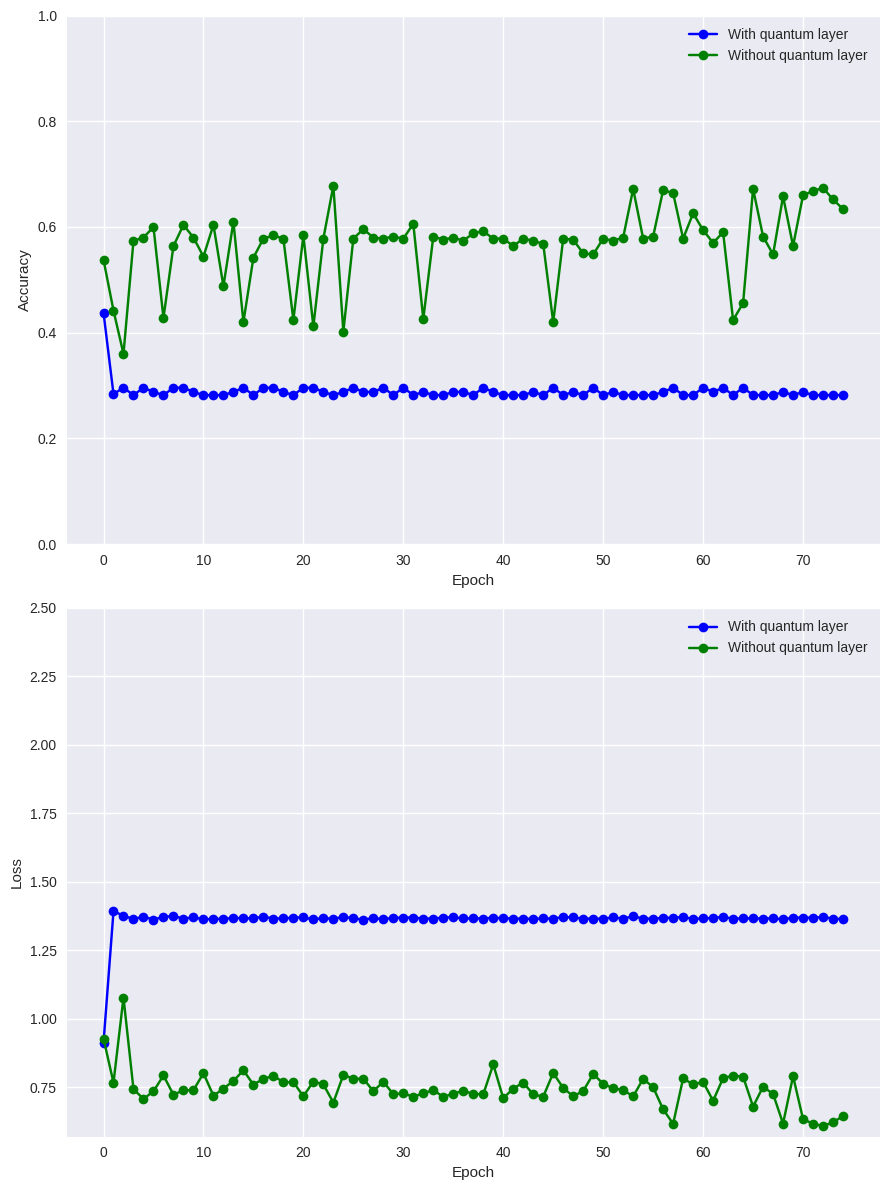

In [ ]:
plot_comparison(q_history_NN3_amp, c_history_NN3)

##Basic_NN2

###Quantum

In [ ]:
q_model_NN2_amp = MyModel2()

n_epochs = 75

q_history_NN2_amp = q_model_NN2_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 6s - loss: 1.5181 - accuracy: 0.2684 - val_loss: 1.3730 - val_accuracy: 0.2960 - 6s/epoch - 9ms/step
Epoch 2/75
625/625 - 3s - loss: 1.4415 - accuracy: 0.2664 - val_loss: 1.3723 - val_accuracy: 0.2880 - 3s/epoch - 5ms/step
Epoch 3/75
625/625 - 3s - loss: 1.4379 - accuracy: 0.2388 - val_loss: 1.3828 - val_accuracy: 0.2880 - 3s/epoch - 4ms/step
Epoch 4/75
625/625 - 3s - loss: 1.4091 - accuracy: 0.2492 - val_loss: 1.3652 - val_accuracy: 0.2820 - 3s/epoch - 4ms/step
Epoch 5/75
625/625 - 3s - loss: 1.3982 - accuracy: 0.2632 - val_loss: 1.3766 - val_accuracy: 0.2880 - 3s/epoch - 5ms/step
Epoch 6/75
625/625 - 3s - loss: 1.4020 - accuracy: 0.2524 - val_loss: 1.3739 - val_accuracy: 0.2820 - 3s/epoch - 5ms/step
Epoch 7/75
625/625 - 3s - loss: 1.3980 - accuracy: 0.2544 - val_loss: 1.3774 - val_accuracy: 0.2880 - 3s/epoch - 5ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3918 - accuracy: 0.2620 - val_loss: 1.3714 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN2_amp = np.argmax(q_model_NN2_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN2, q_precision_amp_NN2, q_recall_amp_NN2, q_accuracy_amp_NN2 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN2_amp)
print("F1 Score:", q_f1_amp_NN2)
print("Precision:", q_precision_amp_NN2)
print("Recall:", q_recall_amp_NN2)
print("Accuracy:", q_accuracy_amp_NN2)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


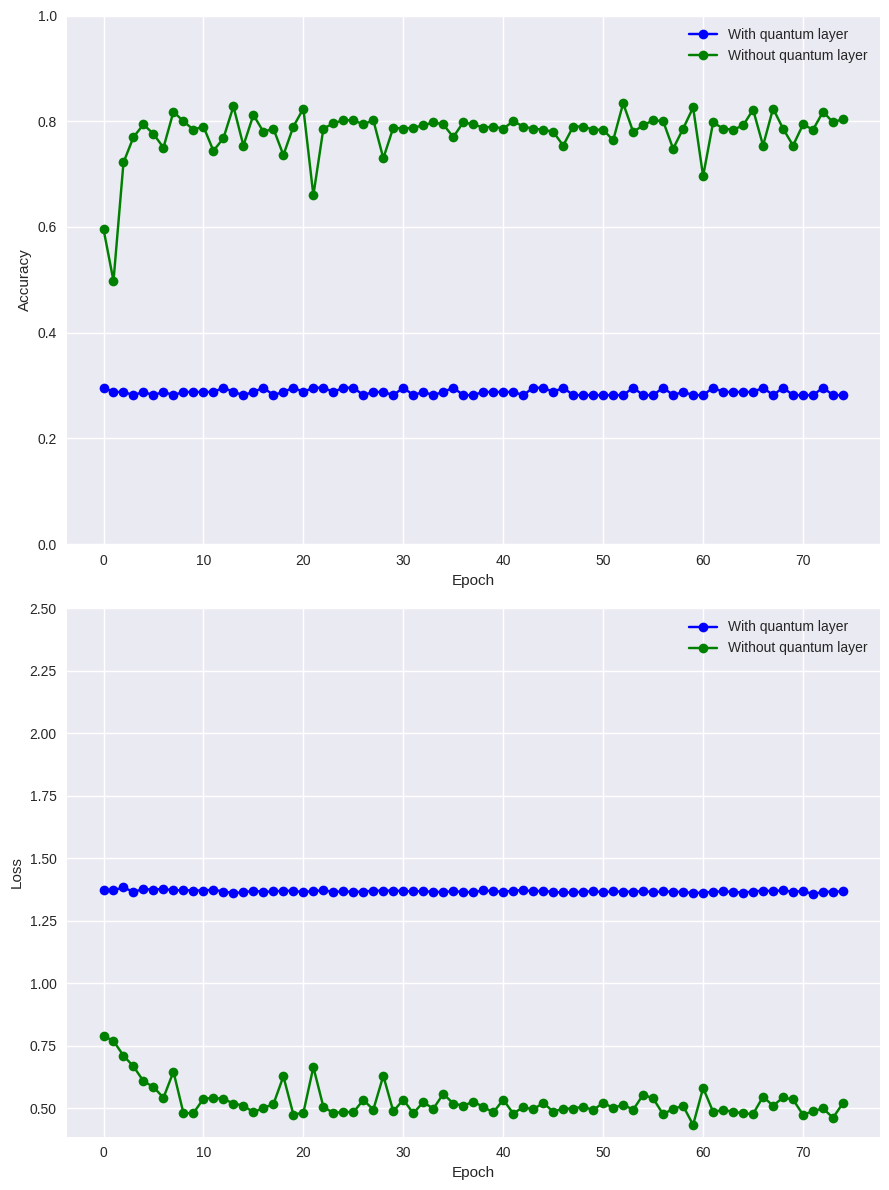

In [ ]:
plot_comparison(q_history_NN2_amp, c_history_NN2)

##Basic_NN1

###Quantum

In [ ]:
q_model_NN1_amp = MyModel1()

n_epochs = 75

q_history_NN1_amp = q_model_NN1_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.2102 - accuracy: 0.4000 - val_loss: 1.0316 - val_accuracy: 0.5440 - 2s/epoch - 4ms/step
Epoch 2/75
625/625 - 2s - loss: 1.0614 - accuracy: 0.4444 - val_loss: 0.9217 - val_accuracy: 0.5740 - 2s/epoch - 2ms/step
Epoch 3/75
625/625 - 2s - loss: 1.0358 - accuracy: 0.4324 - val_loss: 0.8747 - val_accuracy: 0.5620 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.9927 - accuracy: 0.4536 - val_loss: 0.9904 - val_accuracy: 0.5200 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.9906 - accuracy: 0.4348 - val_loss: 0.8392 - val_accuracy: 0.5660 - 2s/epoch - 2ms/step
Epoch 6/75
625/625 - 2s - loss: 0.9688 - accuracy: 0.4252 - val_loss: 0.8239 - val_accuracy: 0.5720 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.9591 - accuracy: 0.4572 - val_loss: 0.8781 - val_accuracy: 0.5300 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 2s - loss: 0.9525 - accuracy: 0.4264 - val_loss: 0.8150 - val_accuracy: 0.5660 - 2s/epoch - 2ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN1_amp = np.argmax(q_model_NN1_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN1, q_precision_amp_NN1, q_recall_amp_NN1, q_accuracy_amp_NN1 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN1_amp)
print("F1 Score:", q_f1_amp_NN1)
print("Precision:", q_precision_amp_NN1)
print("Recall:", q_recall_amp_NN1)
print("Accuracy:", q_accuracy_amp_NN1)

F1 Score: 0.41159592954990215
Precision: 0.3331659165916592
Recall: 0.554
Accuracy: 0.554


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


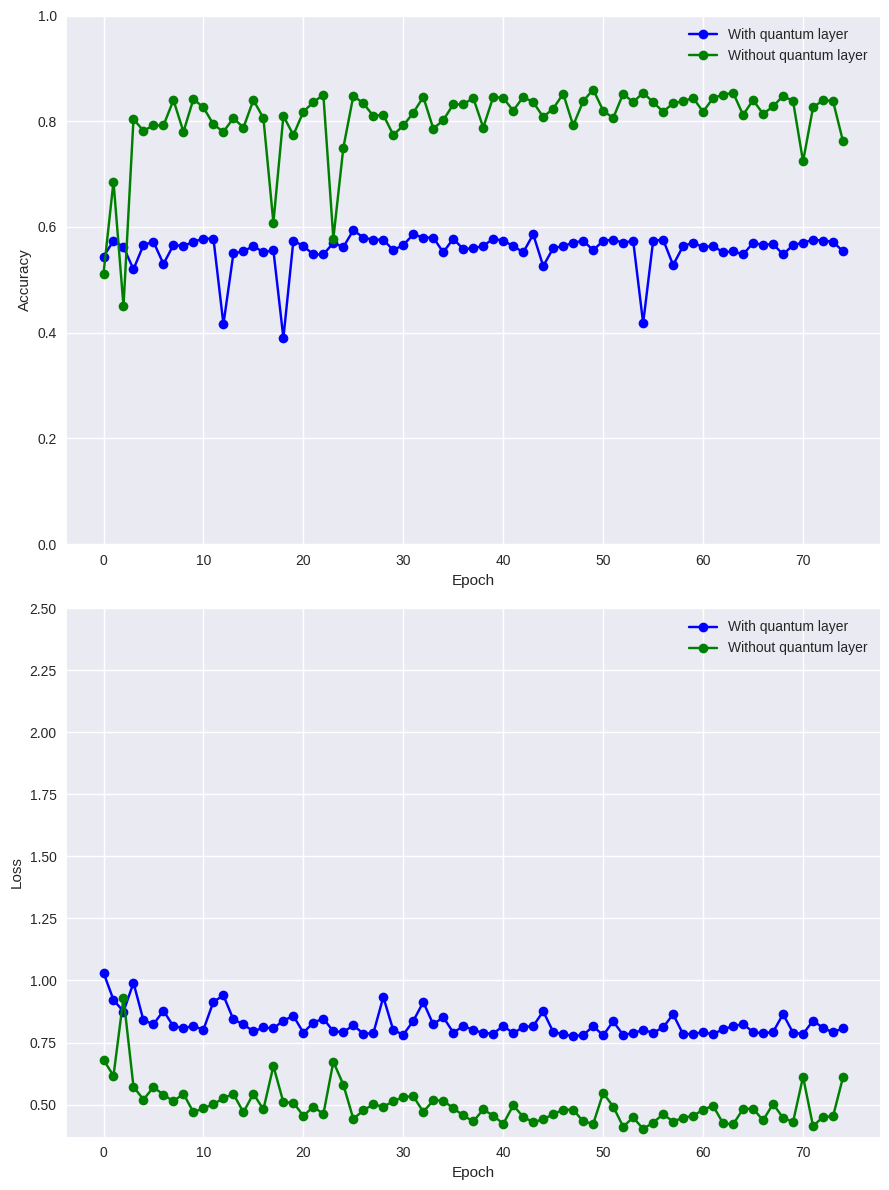

In [ ]:
plot_comparison(q_history_NN1_amp, c_history_NN1)

##Basic_NN

###Quantum

In [ ]:
q_model_NN_amp = MyModel()

n_epochs = 75

q_history_NN_amp = q_model_NN_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.0531 - accuracy: 0.4868 - val_loss: 0.7550 - val_accuracy: 0.5360 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9918 - accuracy: 0.5248 - val_loss: 0.9332 - val_accuracy: 0.4480 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 1s - loss: 0.8827 - accuracy: 0.5668 - val_loss: 0.6686 - val_accuracy: 0.6760 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.9007 - accuracy: 0.5572 - val_loss: 1.0389 - val_accuracy: 0.4880 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.8797 - accuracy: 0.5724 - val_loss: 1.1253 - val_accuracy: 0.6080 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.7909 - accuracy: 0.6108 - val_loss: 0.7856 - val_accuracy: 0.5980 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.8441 - accuracy: 0.6136 - val_loss: 0.9186 - val_accuracy: 0.5160 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 0.7656 - accuracy: 0.6140 - val_loss: 0.8320 - val_accuracy: 0.5020 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN_amp = np.argmax(q_model_NN_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN, q_precision_amp_NN, q_recall_amp_NN, q_accuracy_amp_NN = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN_amp)
print("F1 Score:", q_f1_amp_NN)
print("Precision:", q_precision_amp_NN)
print("Recall:", q_recall_amp_NN)
print("Accuracy:", q_accuracy_amp_NN)

F1 Score: 0.5877254264618528
Precision: 0.5221105152418405
Recall: 0.694
Accuracy: 0.694


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


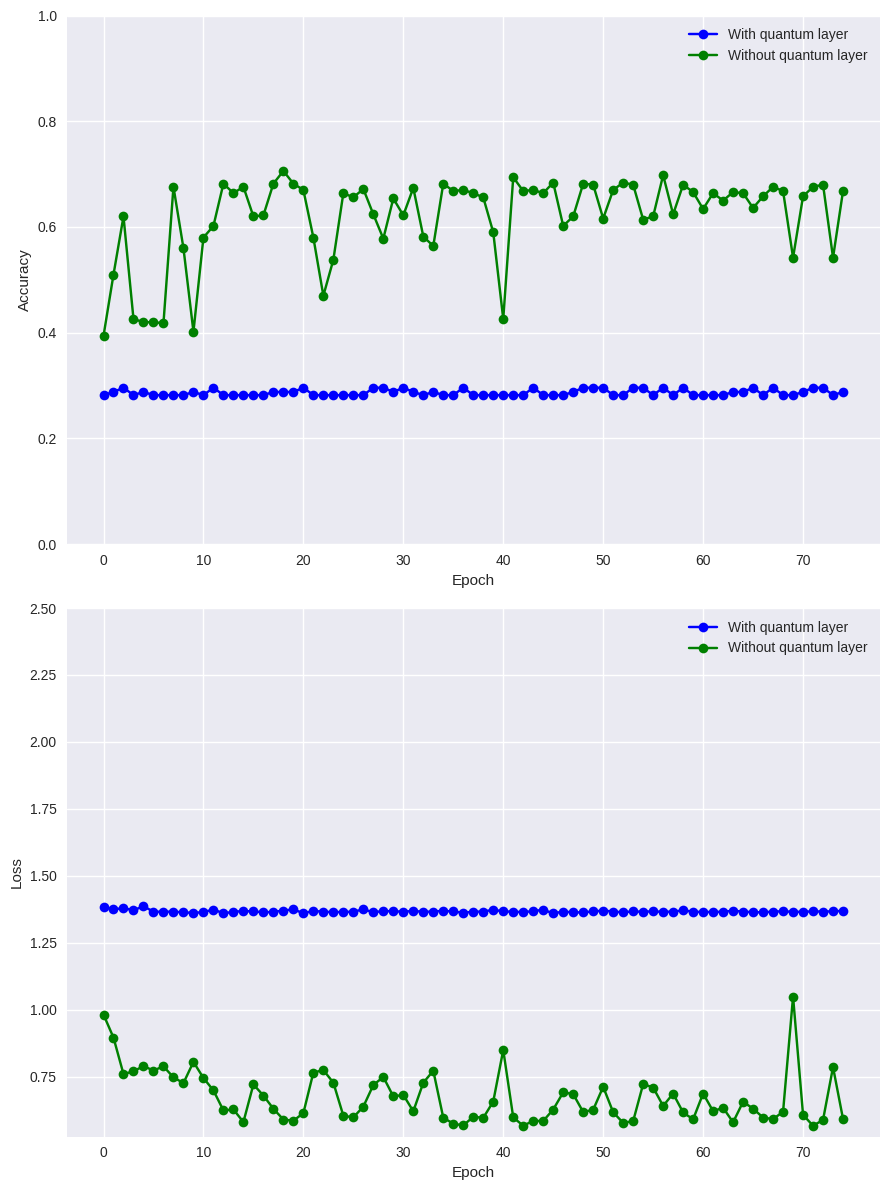

In [ ]:
plot_comparison(q_history_NN5_amp, c_history_NN5)

##CNN

###Quantum

In [ ]:
q_CNN_model_amp = MyCNNModel()

n_epochs = 75

q_history_CNN_amp = q_CNN_model_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 0.8828 - accuracy: 0.4980 - val_loss: 0.7327 - val_accuracy: 0.6140 - 3s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.8078 - accuracy: 0.5200 - val_loss: 0.7326 - val_accuracy: 0.5560 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 3s - loss: 0.7913 - accuracy: 0.5212 - val_loss: 0.7702 - val_accuracy: 0.4880 - 3s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.7943 - accuracy: 0.5136 - val_loss: 0.7248 - val_accuracy: 0.5880 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.7708 - accuracy: 0.5268 - val_loss: 0.6929 - val_accuracy: 0.6020 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.2149 - accuracy: 0.3708 - val_loss: 1.4382 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.4171 - accuracy: 0.2480 - val_loss: 1.3661 - val_accuracy: 0.2880 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 3s - loss: 1.4117 - accuracy: 0.2600 - val_loss: 1.4331 - val_accuracy: 0.1340 - 3s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_CNN_amp = np.argmax(q_CNN_model_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_CNN_amp, q_precision_CNN_amp, q_recall_CNN_amp, q_accuracy_CNN_amp = calculate_classification_metrics(q_test_label_amp, q_y_pred_CNN_amp)
print("F1 Score:", q_f1_CNN_amp)
print("Precision:", q_precision_CNN_amp)
print("Recall:", q_recall_CNN_amp)
print("Accuracy:", q_accuracy_CNN_amp)

F1 Score: 0.12879503105590062
Precision: 0.08294399999999999
Recall: 0.288
Accuracy: 0.288


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


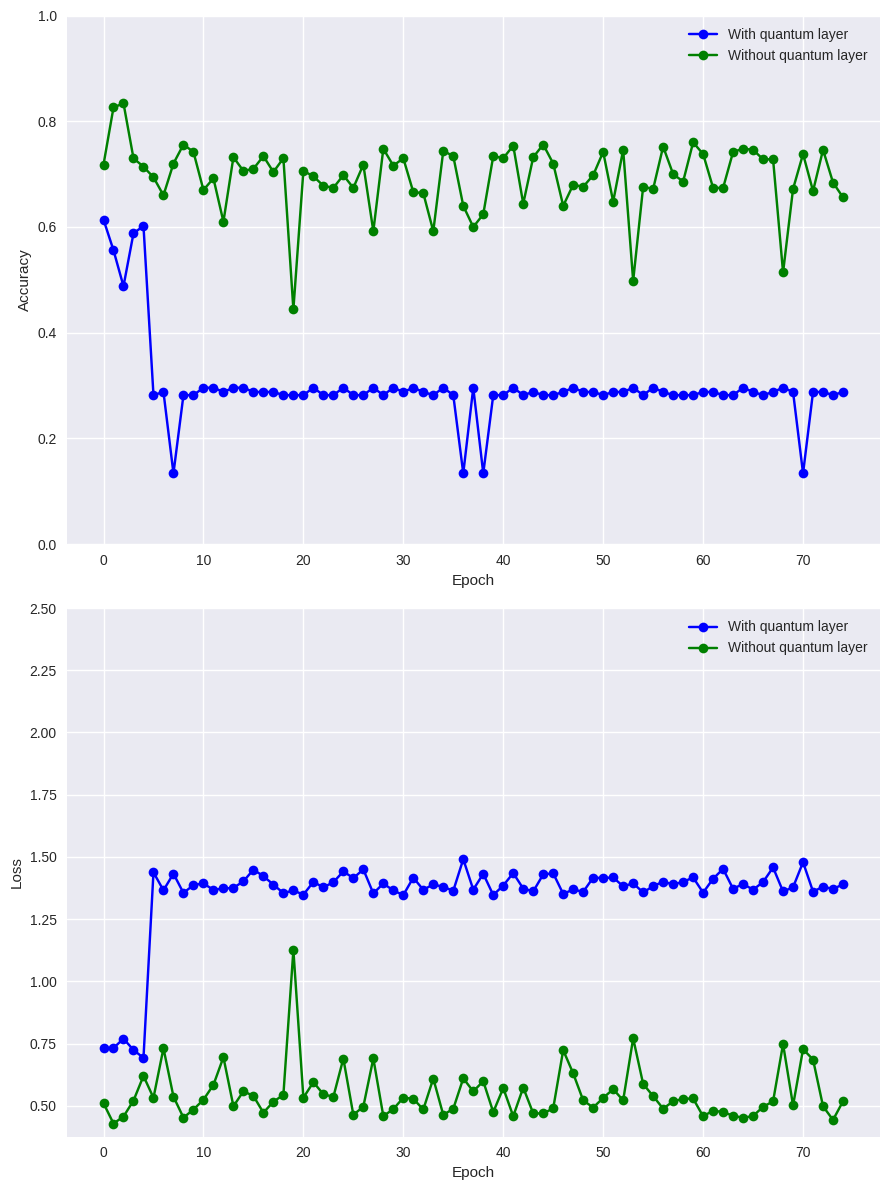

In [ ]:
plot_comparison(q_history_CNN_amp, c_history_CNN)

##SVM

###Quantum

In [ ]:
# Reshape the input data to flatten the color channels
q_train_color_images_amp_flattened = q_train_color_images_amp.reshape(q_train_color_images_amp.shape[0], -1)
q_test_color_images_amp_flattened = q_test_color_images_amp.reshape(q_test_color_images_amp.shape[0], -1)

In [ ]:
q_svm_model_amp = MySVMModel()

n_epochs = 75

q_svm_history_amp = q_svm_model_amp.fit(
    q_train_color_images_amp_flattened,
    q_train_label_amp
)

In [ ]:
q_y_predSVM_amp = q_svm_model_amp.predict(q_test_color_images_amp_flattened)

In [ ]:
# Calculate classification metrics
q_f1_SVM_amp, q_precision_SVM_amp, q_recall_SVM_amp, q_accuracy_SVM_amp = calculate_classification_metrics(q_test_label_amp, q_y_predSVM_amp)
print("F1 Score:", q_f1_SVM_amp)
print("Precision:", q_precision_SVM_amp)
print("Recall:", q_recall_SVM_amp)
print("Accuracy:", q_accuracy_SVM_amp)

F1 Score: 0.7682752682762494
Precision: 0.7905203788186066
Recall: 0.77
Accuracy: 0.77


#Basis_Encoded

##Basic_NN6

###Quantum

In [ ]:
q_train_color_images_basis = np.load(SAVE_PATH_1 + "q_train_color_images_basis.npy")
q_test_color_images_basis = np.load(SAVE_PATH_1 + "q_test_color_images_basis.npy")
q_train_label_basis = np.load(SAVE_PATH_1 + "q_train_label_basis.npy")
q_test_label_basis = np.load(SAVE_PATH_1 + "q_test_label_basis.npy")

In [ ]:
q_model_NN6_basis = MyModel6()

n_epochs = 75

q_history_NN6_basis = q_model_NN6_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4714 - accuracy: 0.2616 - val_loss: 1.3758 - val_accuracy: 0.2820 - 4s/epoch - 7ms/step
Epoch 2/75
625/625 - 3s - loss: 1.4317 - accuracy: 0.2612 - val_loss: 1.3657 - val_accuracy: 0.2960 - 3s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 1.4181 - accuracy: 0.2476 - val_loss: 1.3610 - val_accuracy: 0.2960 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 1.4100 - accuracy: 0.2488 - val_loss: 1.3661 - val_accuracy: 0.2880 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 1.4013 - accuracy: 0.2460 - val_loss: 1.3775 - val_accuracy: 0.2880 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 3s - loss: 1.4029 - accuracy: 0.2488 - val_loss: 1.3730 - val_accuracy: 0.2820 - 3s/epoch - 4ms/step
Epoch 7/75
625/625 - 3s - loss: 1.3923 - accuracy: 0.2608 - val_loss: 1.3675 - val_accuracy: 0.2820 - 3s/epoch - 5ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3937 - accuracy: 0.2536 - val_loss: 1.3717 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN6_basis = np.argmax(q_model_NN6_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN6, q_precision_basis_NN6, q_recall_basis_NN6, q_accuracy_basis_NN6 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN6_basis)
print("F1 Score:", q_f1_basis_NN6)
print("Precision:", q_precision_basis_NN6)
print("Recall:", q_recall_basis_NN6)
print("Accuracy:", q_accuracy_basis_NN6)

F1 Score: 0.13520987654320987
Precision: 0.087616
Recall: 0.296
Accuracy: 0.296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


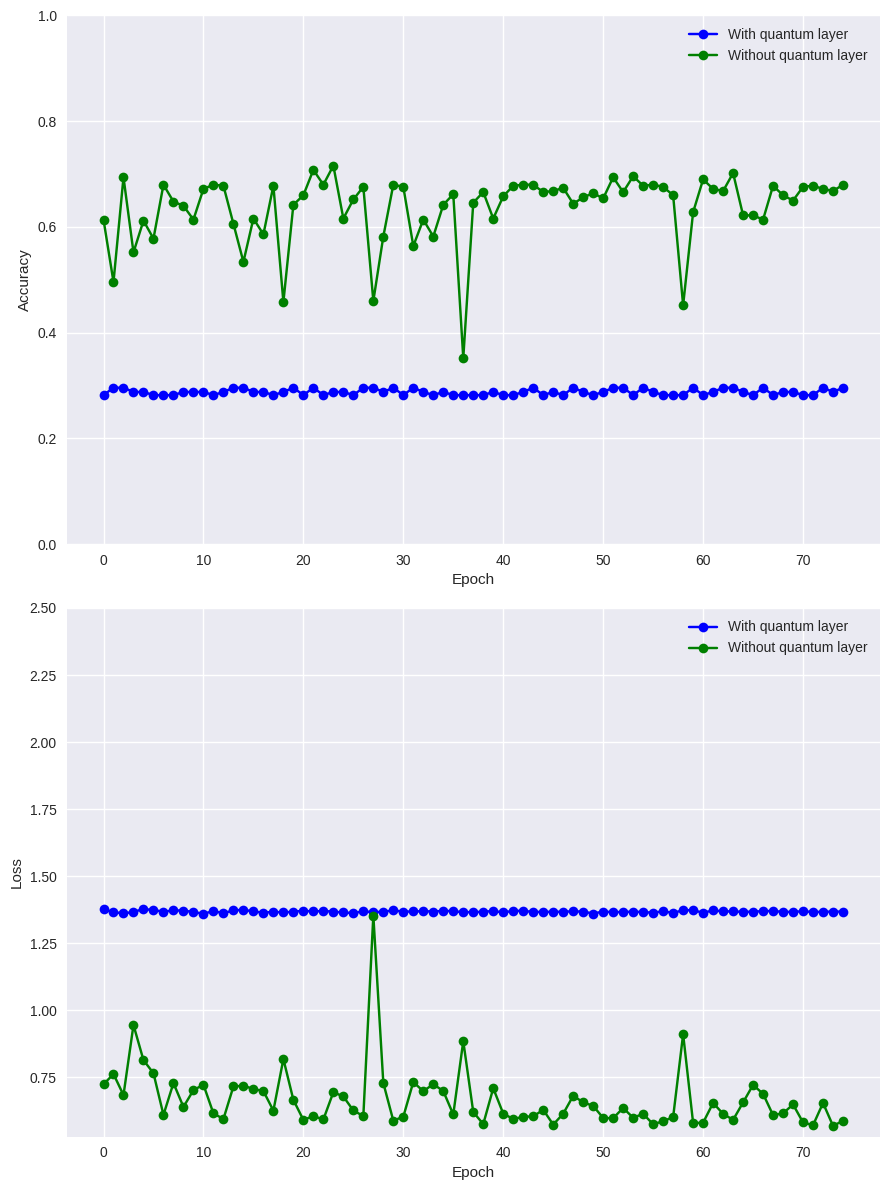

In [ ]:
plot_comparison(q_history_NN6_basis, c_history_NN6)

##Basic_NN5

###Quantum

In [ ]:
q_model_NN5_basis = MyModel5()

n_epochs = 75

q_history_NN5_basis = q_model_NN5_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4423 - accuracy: 0.2612 - val_loss: 1.3836 - val_accuracy: 0.2880 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 1.4180 - accuracy: 0.2556 - val_loss: 1.3558 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.4069 - accuracy: 0.2572 - val_loss: 1.3576 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3993 - accuracy: 0.2500 - val_loss: 1.3627 - val_accuracy: 0.2960 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3903 - accuracy: 0.2544 - val_loss: 1.3613 - val_accuracy: 0.2820 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3935 - accuracy: 0.2416 - val_loss: 1.3680 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3876 - accuracy: 0.2720 - val_loss: 1.3572 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3866 - accuracy: 0.2608 - val_loss: 1.3783 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN5_basis = np.argmax(q_model_NN5_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN5, q_precision_basis_NN5, q_recall_basis_NN5, q_accuracy_basis_NN5 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN5_basis)
print("F1 Score:", q_f1_basis_NN5)
print("Precision:", q_precision_basis_NN5)
print("Recall:", q_recall_basis_NN5)
print("Accuracy:", q_accuracy_basis_NN5)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


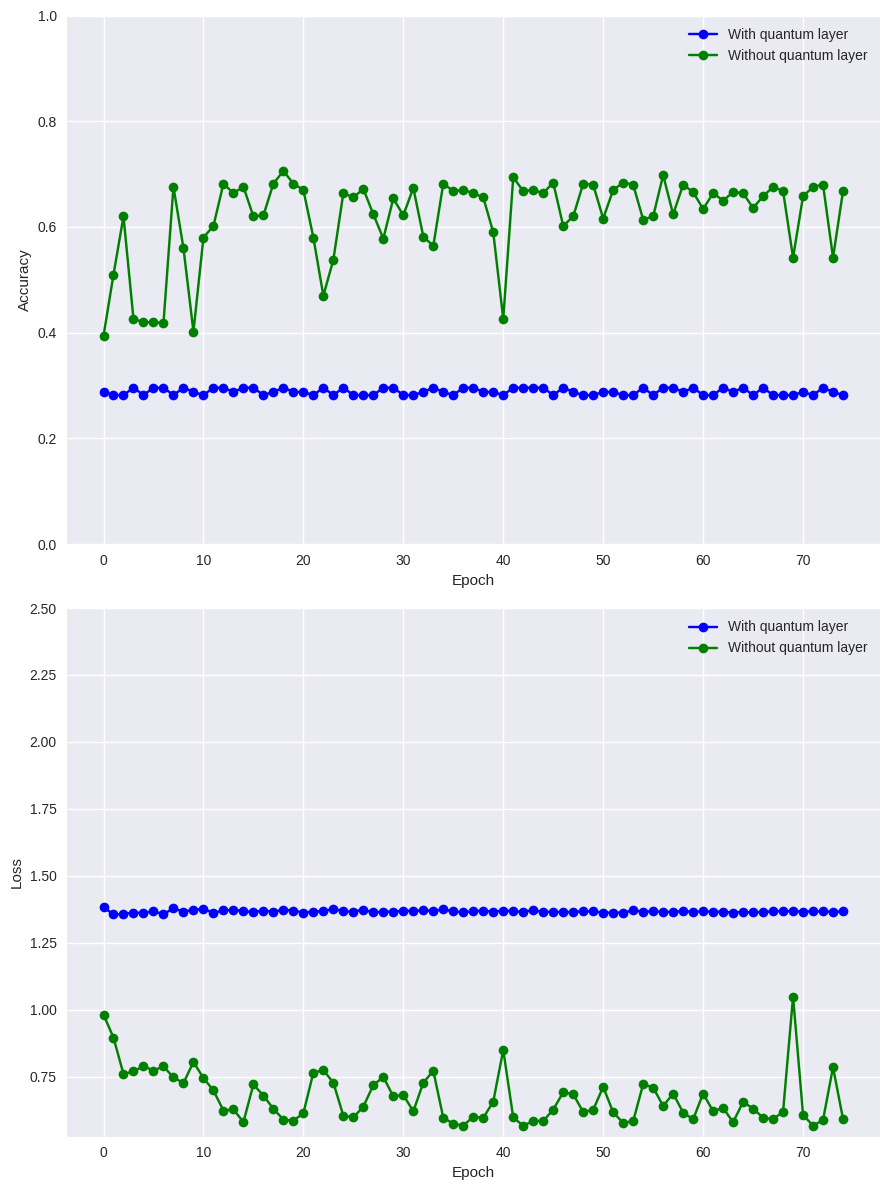

In [ ]:
plot_comparison(q_history_NN5_basis, c_history_NN5)

##Basic_NN4

###Quantum

In [ ]:
q_model_NN4_basis = MyModel4()

n_epochs = 75

q_history_NN4_basis = q_model_NN4_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4479 - accuracy: 0.2460 - val_loss: 1.3573 - val_accuracy: 0.2880 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 1.4143 - accuracy: 0.2716 - val_loss: 1.3763 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.4091 - accuracy: 0.2592 - val_loss: 1.3730 - val_accuracy: 0.2880 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3972 - accuracy: 0.2596 - val_loss: 1.3863 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.4002 - accuracy: 0.2400 - val_loss: 1.3808 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3938 - accuracy: 0.2456 - val_loss: 1.3714 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3863 - accuracy: 0.2720 - val_loss: 1.3810 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3884 - accuracy: 0.2608 - val_loss: 1.3673 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN4_basis = np.argmax(q_model_NN4_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
4# Calculate classification metrics
q_f1_basis_NN4, q_precision_basis_NN4, q_recall_basis_NN4, q_accuracy_basis_NN4 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN4_basis)
print("F1 Score:", q_f1_basis_NN4)
print("Precision:", q_precision_basis_NN4)
print("Recall:", q_recall_basis_NN4)
print("Accuracy:", q_accuracy_basis_NN4)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


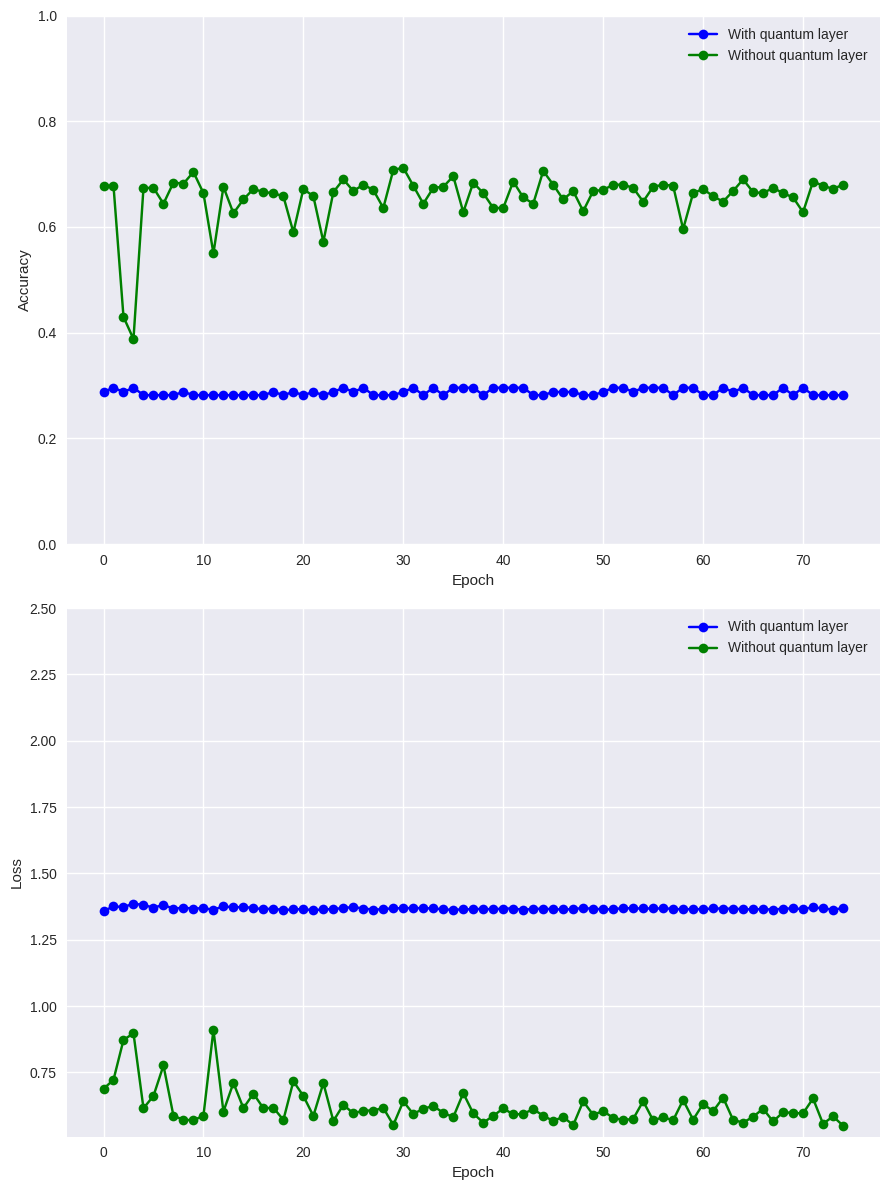

In [ ]:
plot_comparison(q_history_NN4_basis, c_history_NN4)

##Basic_NN3

###Quantum

In [ ]:
q_model_NN3_basis = MyModel3()

n_epochs = 75

q_history_NN3_basis = q_model_NN3_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.4727 - accuracy: 0.2736 - val_loss: 1.3740 - val_accuracy: 0.2880 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 1.4229 - accuracy: 0.2676 - val_loss: 1.3544 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.4179 - accuracy: 0.2480 - val_loss: 1.3740 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3999 - accuracy: 0.2612 - val_loss: 1.3720 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3947 - accuracy: 0.2632 - val_loss: 1.3567 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3978 - accuracy: 0.2560 - val_loss: 1.3643 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 3s - loss: 1.3902 - accuracy: 0.2632 - val_loss: 1.3683 - val_accuracy: 0.2960 - 3s/epoch - 4ms/step
Epoch 8/75
625/625 - 3s - loss: 1.3916 - accuracy: 0.2512 - val_loss: 1.3651 - val_accuracy: 0.2880 - 3s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN3_basis = np.argmax(q_model_NN3_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN3, q_precision_basis_NN3, q_recall_basis_NN3, q_accuracy_basis_NN3 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN3_basis)
print("F1 Score:", q_f1_basis_NN3)
print("Precision:", q_precision_basis_NN3)
print("Recall:", q_recall_basis_NN3)
print("Accuracy:", q_accuracy_basis_NN3)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


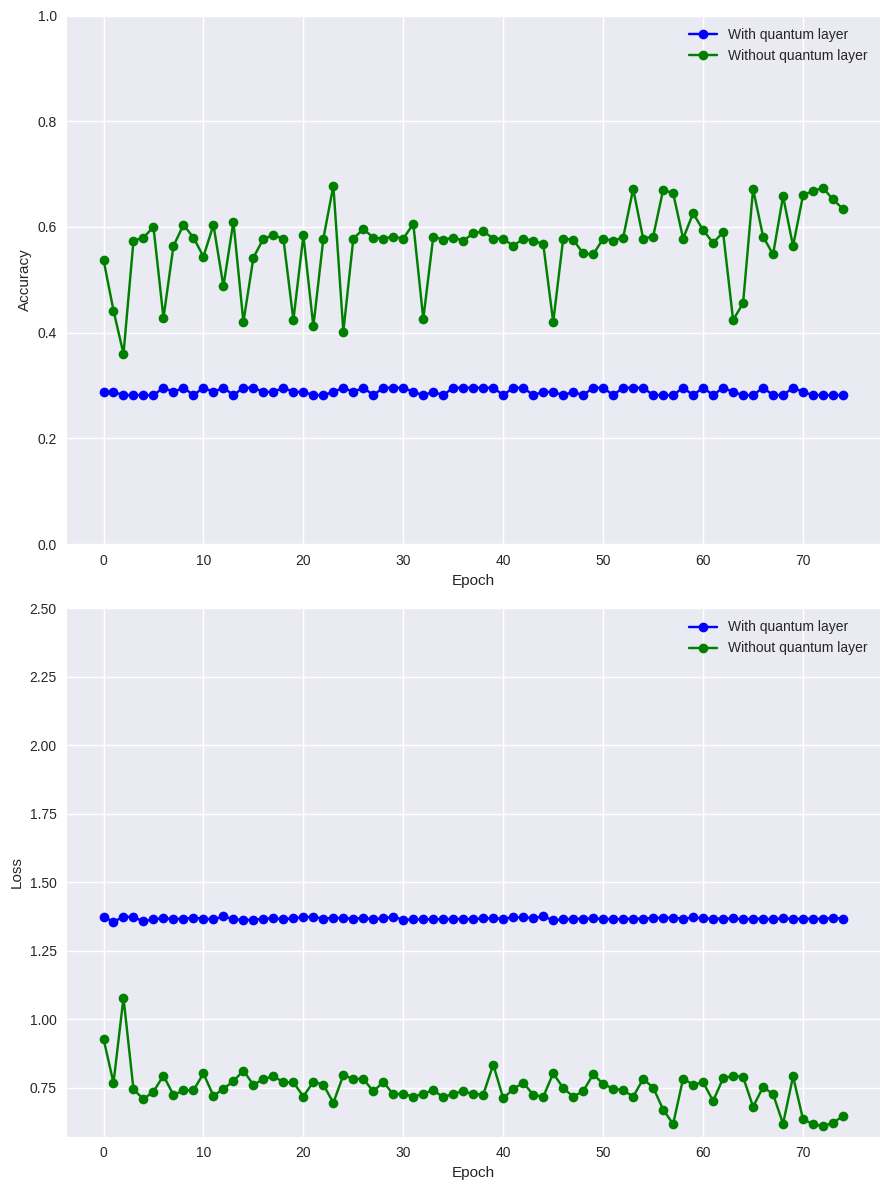

In [ ]:
plot_comparison(q_history_NN3_basis, c_history_NN3)

##Basic_NN2

###Quantum

In [ ]:
q_model_NN2_basis = MyModel2()

n_epochs = 75

q_history_NN2_basis = q_model_NN2_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.4813 - accuracy: 0.2576 - val_loss: 1.3628 - val_accuracy: 0.2820 - 3s/epoch - 4ms/step
Epoch 2/75
625/625 - 2s - loss: 1.4357 - accuracy: 0.2584 - val_loss: 1.3814 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.4209 - accuracy: 0.2556 - val_loss: 1.3592 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.4051 - accuracy: 0.2636 - val_loss: 1.3817 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3990 - accuracy: 0.2472 - val_loss: 1.3778 - val_accuracy: 0.2960 - 2s/epoch - 2ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3964 - accuracy: 0.2432 - val_loss: 1.3626 - val_accuracy: 0.2880 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3947 - accuracy: 0.2528 - val_loss: 1.3670 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3895 - accuracy: 0.2560 - val_loss: 1.3692 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN2_basis = np.argmax(q_model_NN2_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN2, q_precision_basis_NN2, q_recall_basis_NN2, q_accuracy_basis_NN2 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN2_basis)
print("F1 Score:", q_f1_basis_NN2)
print("Precision:", q_precision_basis_NN2)
print("Recall:", q_recall_basis_NN2)
print("Accuracy:", q_accuracy_basis_NN2)

F1 Score: 0.13520987654320987
Precision: 0.087616
Recall: 0.296
Accuracy: 0.296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


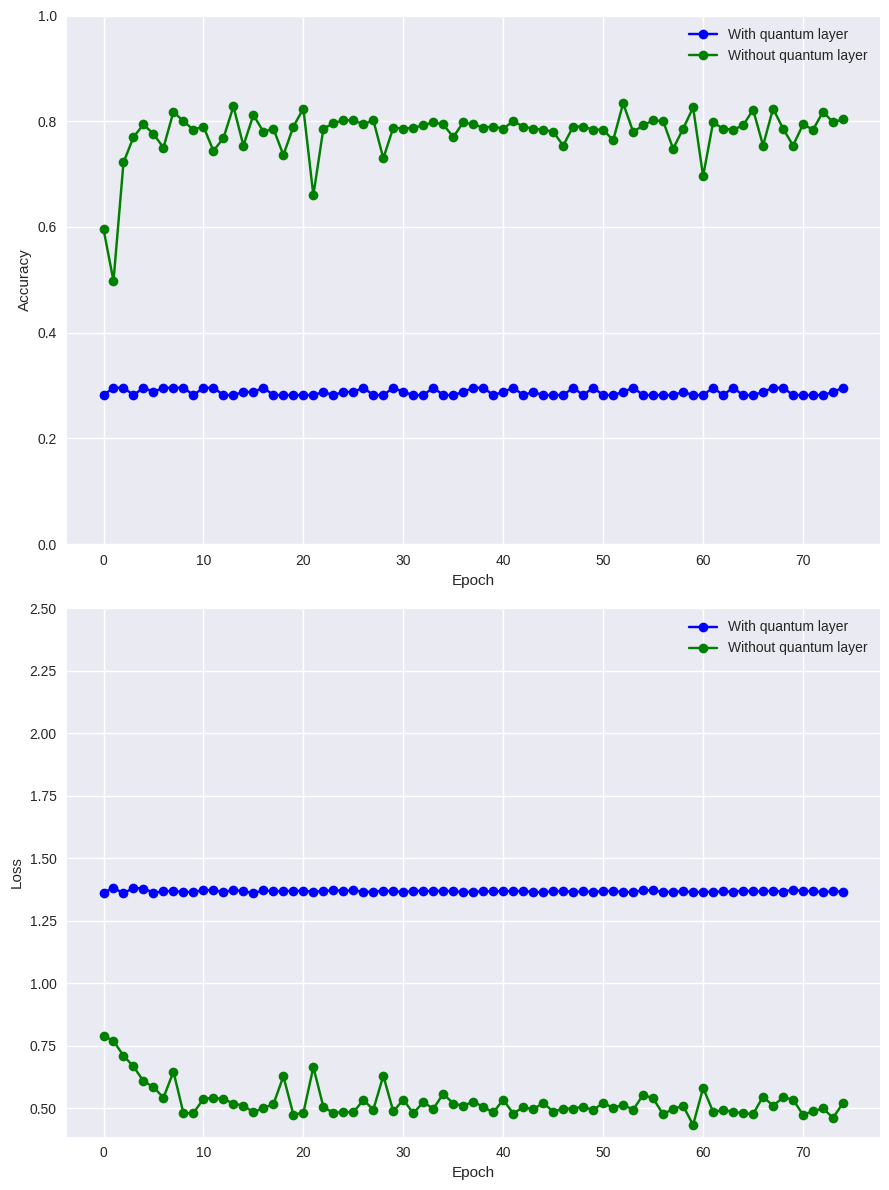

In [ ]:
plot_comparison(q_history_NN2_basis, c_history_NN2)

##Basic_NN1

###Quantum

In [ ]:
q_model_NN1_basis = MyModel1()

n_epochs = 75

q_history_NN1_basis = q_model_NN1_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.5379 - accuracy: 0.2520 - val_loss: 1.3723 - val_accuracy: 0.2880 - 2s/epoch - 4ms/step
Epoch 2/75
625/625 - 1s - loss: 1.4860 - accuracy: 0.2536 - val_loss: 1.3650 - val_accuracy: 0.2880 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 1.4669 - accuracy: 0.2616 - val_loss: 1.3712 - val_accuracy: 0.2880 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 2s - loss: 1.4504 - accuracy: 0.2580 - val_loss: 1.3757 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.4421 - accuracy: 0.2540 - val_loss: 1.3643 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.4275 - accuracy: 0.2680 - val_loss: 1.3677 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 1s - loss: 1.4159 - accuracy: 0.2432 - val_loss: 1.3746 - val_accuracy: 0.2960 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 1.4048 - accuracy: 0.2584 - val_loss: 1.3666 - val_accuracy: 0.2880 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN1_basis = np.argmax(q_model_NN1_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN1, q_precision_basis_NN1, q_recall_basis_NN1, q_accuracy_basis_NN1 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN1_basis)
print("F1 Score:", q_f1_basis_NN1)
print("Precision:", q_precision_basis_NN1)
print("Recall:", q_recall_basis_NN1)
print("Accuracy:", q_accuracy_basis_NN1)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


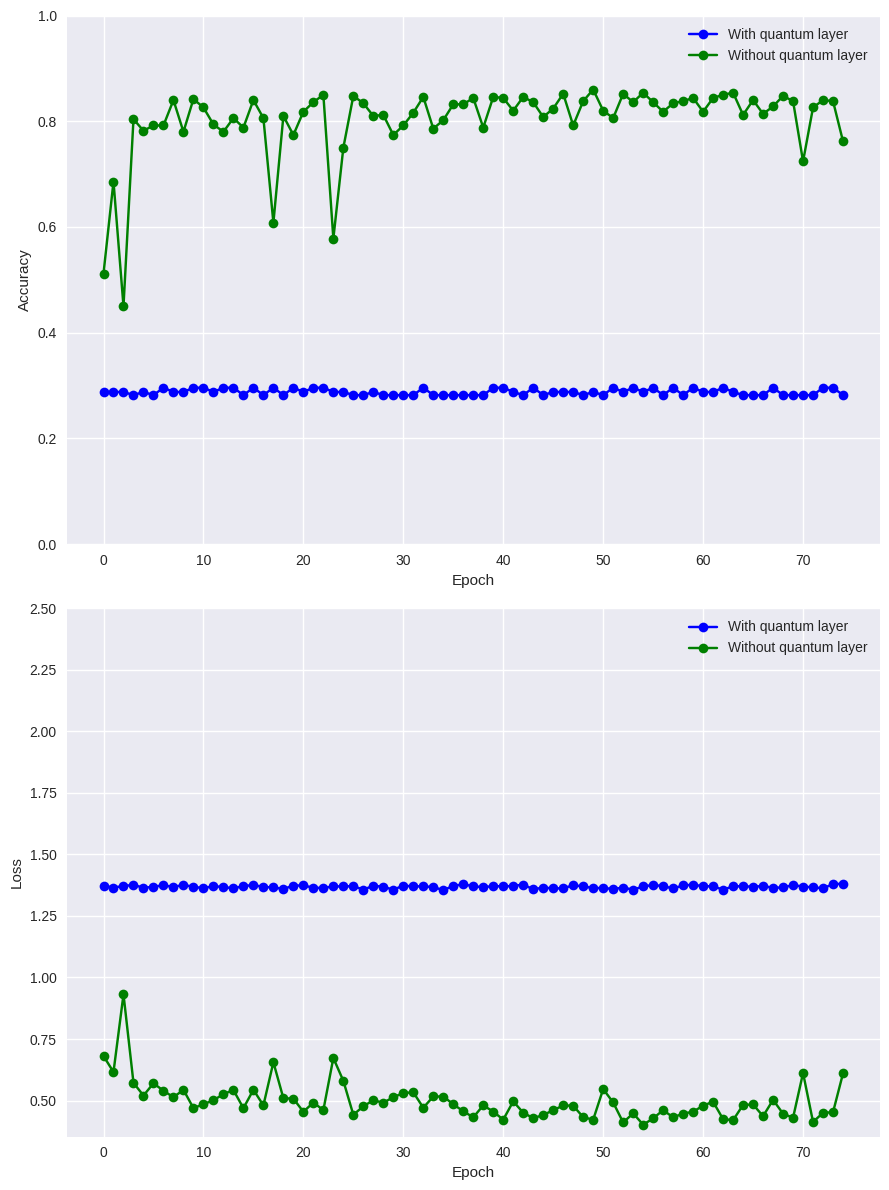

In [ ]:
plot_comparison(q_history_NN1_basis, c_history_NN1)

##Basic_NN

###Quantum

In [ ]:
q_model_NN_basis = MyModel()

n_epochs = 75

q_history_NN_basis = q_model_NN_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.1974 - accuracy: 0.4732 - val_loss: 0.9210 - val_accuracy: 0.4220 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 1s - loss: 1.0393 - accuracy: 0.5132 - val_loss: 0.7221 - val_accuracy: 0.6400 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.9687 - accuracy: 0.5264 - val_loss: 0.7878 - val_accuracy: 0.5320 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.9379 - accuracy: 0.5460 - val_loss: 0.7198 - val_accuracy: 0.4320 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.9717 - accuracy: 0.5524 - val_loss: 0.9466 - val_accuracy: 0.4900 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.8824 - accuracy: 0.5628 - val_loss: 0.7974 - val_accuracy: 0.5140 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.9361 - accuracy: 0.5660 - val_loss: 0.7664 - val_accuracy: 0.5040 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 2s - loss: 0.9079 - accuracy: 0.5556 - val_loss: 0.8125 - val_accuracy: 0.6300 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN_basis = np.argmax(q_model_NN_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN, q_precision_basis_NN, q_recall_basis_NN, q_accuracy_basis_NN = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN_basis)
print("F1 Score:", q_f1_basis_NN)
print("Precision:", q_precision_basis_NN)
print("Recall:", q_recall_basis_NN)
print("Accuracy:", q_accuracy_basis_NN)

F1 Score: 0.5258236632485481
Precision: 0.7031037493063264
Recall: 0.62
Accuracy: 0.62


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


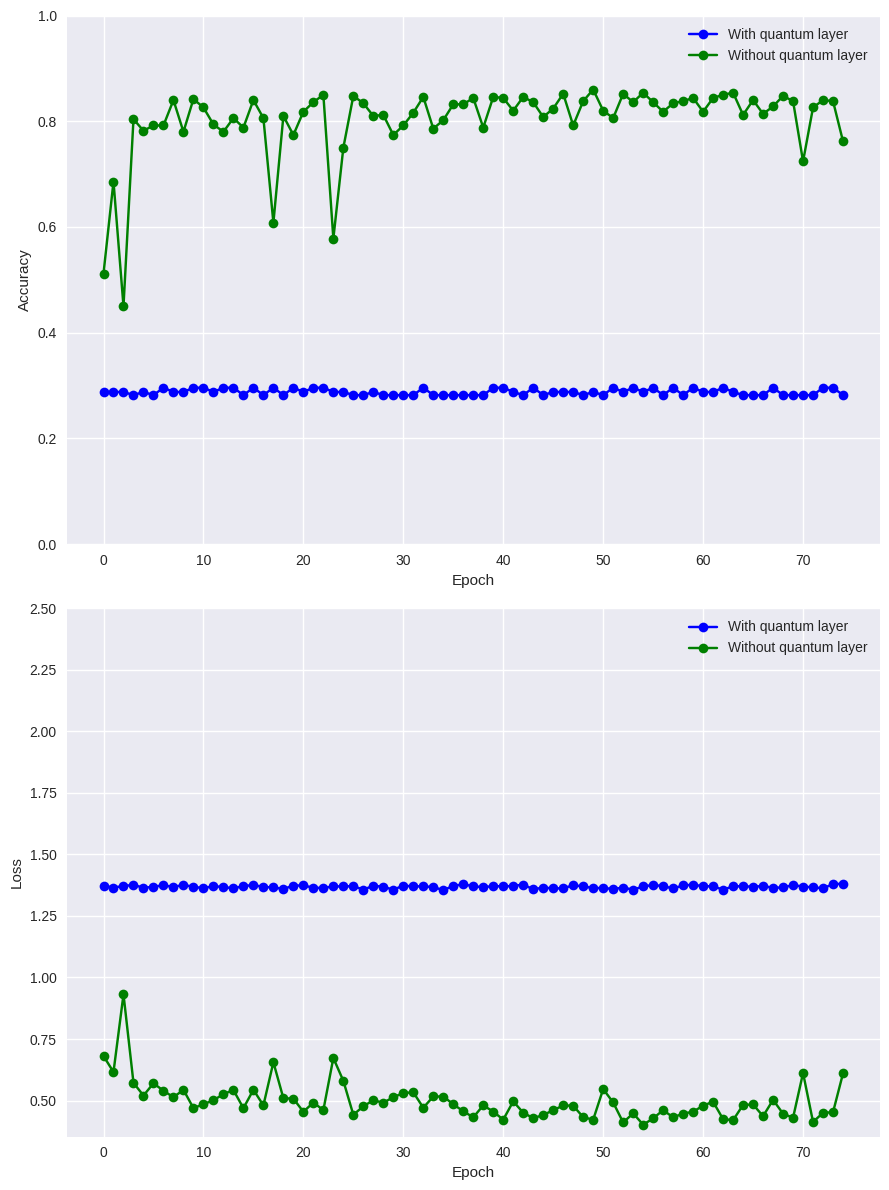

In [ ]:
plot_comparison(q_history_NN1_basis, c_history_NN1)

##CNN

###Quantum

In [ ]:
q_CNN_model_basis = MyCNNModel()

n_epochs = 75

q_history_CNN_basis = q_CNN_model_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 0.8932 - accuracy: 0.5080 - val_loss: 0.7405 - val_accuracy: 0.5500 - 3s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7815 - accuracy: 0.5272 - val_loss: 0.9213 - val_accuracy: 0.3860 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 3s - loss: 0.7956 - accuracy: 0.5296 - val_loss: 0.9908 - val_accuracy: 0.3960 - 3s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8222 - accuracy: 0.5388 - val_loss: 0.7490 - val_accuracy: 0.5940 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8559 - accuracy: 0.4948 - val_loss: 1.1778 - val_accuracy: 0.3460 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.9094 - accuracy: 0.4904 - val_loss: 0.7799 - val_accuracy: 0.5720 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.2254 - accuracy: 0.4024 - val_loss: 1.4871 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.4143 - accuracy: 0.2516 - val_loss: 1.3892 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
q_y_pred_CNN_basis = np.argmax(q_CNN_model_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_CNN_basis, q_precision_CNN_basis, q_recall_CNN_basis, q_accuracy_CNN_basis = calculate_classification_metrics(q_test_label_basis, q_y_pred_CNN_basis)
print("F1 Score:", q_f1_CNN_basis)
print("Precision:", q_precision_CNN_basis)
print("Recall:", q_recall_CNN_basis)
print("Accuracy:", q_accuracy_CNN_basis)

F1 Score: 0.12879503105590062
Precision: 0.08294399999999999
Recall: 0.288
Accuracy: 0.288


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-20-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


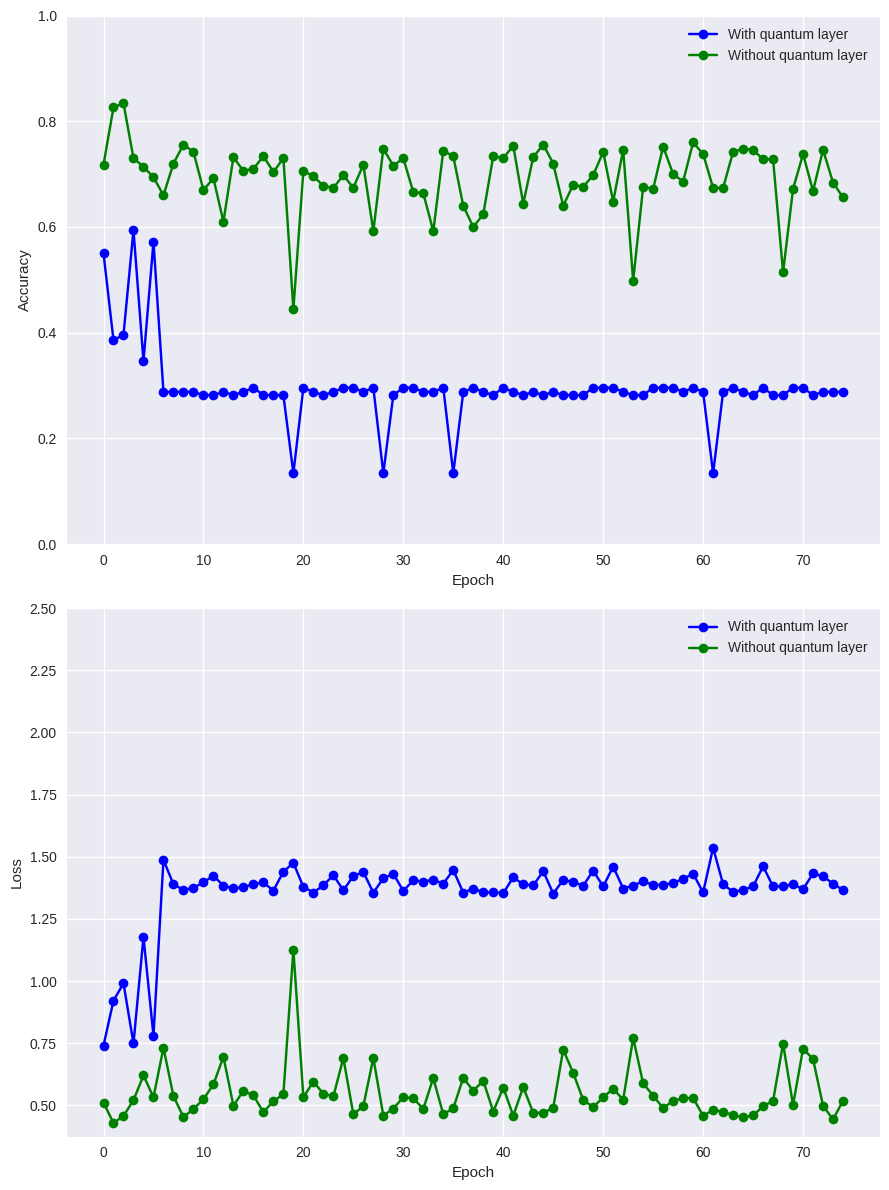

In [ ]:
plot_comparison(q_history_CNN_basis, c_history_CNN)

##SVM

###Quantum

In [ ]:
# Reshape the input data to flatten the color channels
q_train_color_images_basis_flattened = q_train_color_images_basis.reshape(q_train_color_images_basis.shape[0], -1)
q_test_color_images_basis_flattened = q_test_color_images_basis.reshape(q_test_color_images_basis.shape[0], -1)

In [ ]:
q_svm_model_basis = MySVMModel()

n_epochs = 75

q_svm_history_basis = q_svm_model_basis.fit(
    q_train_color_images_basis_flattened,
    q_train_label_basis
)

In [ ]:
q_y_predSVM_basis = q_svm_model_basis.predict(q_test_color_images_basis_flattened)

In [ ]:
# Calculate classification metrics
q_f1_SVM_basis, q_precision_SVM_basis, q_recall_SVM_basis, q_accuracy_SVM_basis = calculate_classification_metrics(q_test_label_basis, q_y_predSVM_basis)
print("F1 Score:", q_f1_SVM_basis)
print("Precision:", q_precision_SVM_basis)
print("Recall:", q_recall_SVM_basis)
print("Accuracy:", q_accuracy_SVM_basis)

F1 Score: 0.7552713058864942
Precision: 0.7873964648748281
Recall: 0.762
Accuracy: 0.762


#Graphs_ang


In [ ]:
import matplotlib.pyplot as plt

def plot_comparison_seven_plots(history_list, labels):
    plt.style.use("seaborn")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Define colors for the plots

    # num_colors = len(history_list)
    # colors = [plt.cm.tab10(i) for i in range(num_colors)]

    for i, history in enumerate(history_list):
        ax1.plot(history.history["val_accuracy"], f"-o{colors[i]}", label=labels[i])
        ax2.plot(history.history["val_loss"], f"-o{colors[i]}", label=labels[i])

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim([0, 1])
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.set_ylabel("Loss")
    ax2.set_ylim(top=2.5)
    ax2.set_xlabel("Epoch")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_comparison([q1_history, q2_history, q3_history, c1_history, c2_history, c3_history],
#                 ["Q1", "Q2", "Q3", "C1", "C2", "C3"])


<ipython-input-160-052b3a70d6f4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


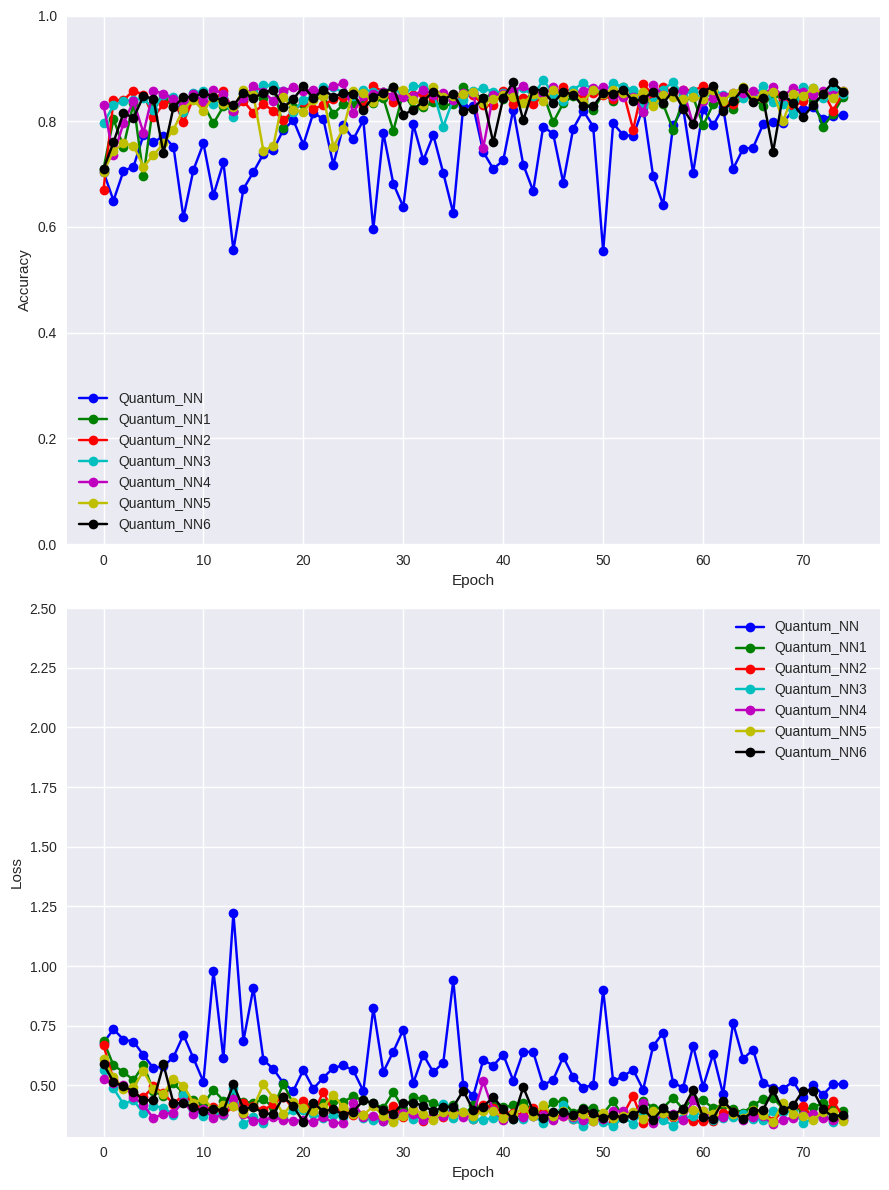

In [ ]:
Q_NN_history_ang_list = [q_history_NN_ang, q_history_NN1_ang, q_history_NN2_ang, q_history_NN3_ang, q_history_NN4_ang, q_history_NN5_ang, q_history_NN6_ang]
Q_NN_labels_ang = ["Quantum_NN", "Quantum_NN1", "Quantum_NN2", "Quantum_NN3", "Quantum_NN4", "Quantum_NN5", "Quantum_NN6"]
plot_comparison_seven_plots(Q_NN_history_ang_list, Q_NN_labels_ang)

<ipython-input-160-052b3a70d6f4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


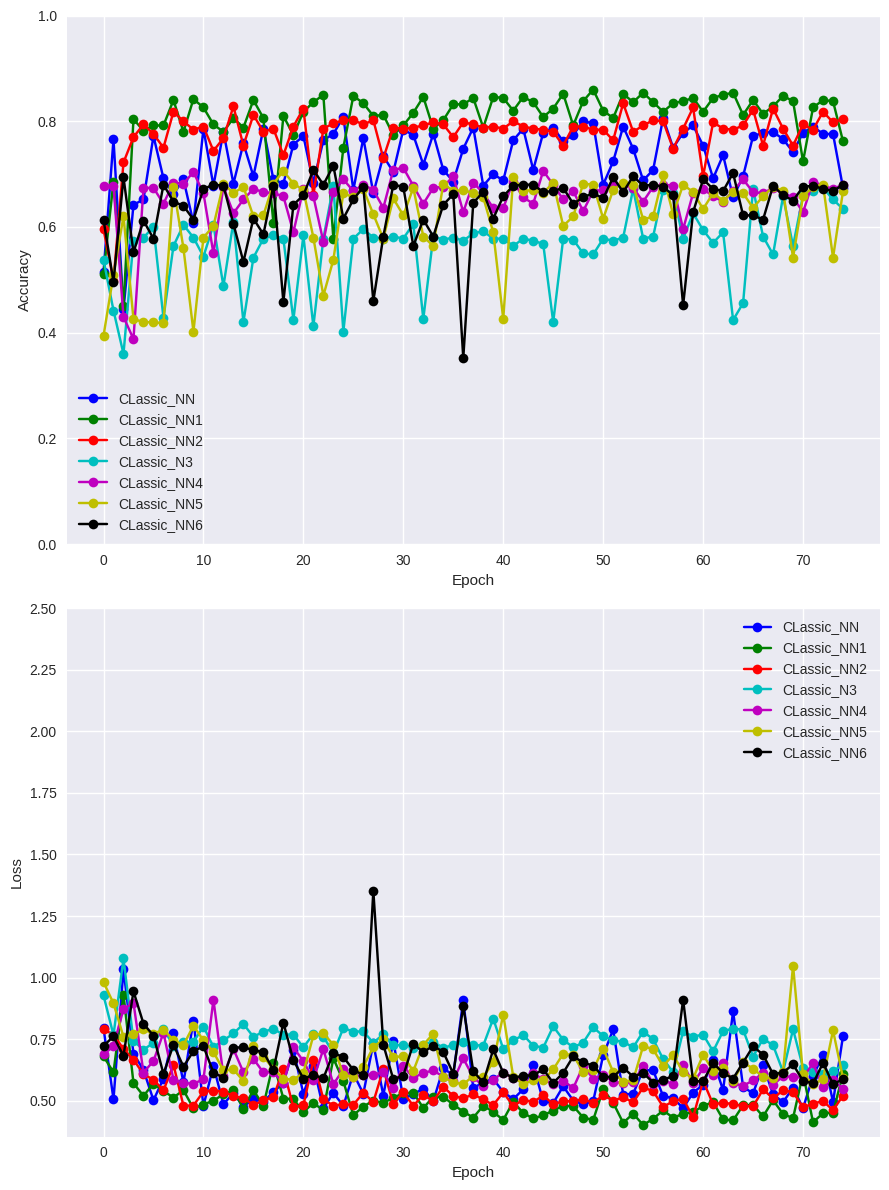

In [ ]:
C_NN_history_ang_list = [c_history_NN, c_history_NN1, c_history_NN2, c_history_NN3, c_history_NN4, c_history_NN5, c_history_NN6]
C_NN_labels_ang = ["CLassic_NN",  "CLassic_NN1",  "CLassic_NN2",  "CLassic_N3",  "CLassic_NN4",  "CLassic_NN5",  "CLassic_NN6"]
plot_comparison_seven_plots(C_NN_history_ang_list, C_NN_labels_ang)

In [ ]:
import matplotlib.pyplot as plt

def plot_comparison_six_plots(history_list, labels):
    plt.style.use("seaborn")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

    colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define colors for the plots

    # num_colors = len(history_list)
    # colors = [plt.cm.tab10(i) for i in range(num_colors)]

    for i, history in enumerate(history_list):
        ax1.plot(history.history["val_accuracy"], f"-o{colors[i]}", label=labels[i])
        ax2.plot(history.history["val_loss"], f"-o{colors[i]}", label=labels[i])

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim([0, 1])
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.set_ylabel("Loss")
    ax2.set_ylim(top=2.5)
    ax2.set_xlabel("Epoch")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_comparison([q1_history, q2_history, q3_history, c1_history, c2_history, c3_history],
#                 ["Q1", "Q2", "Q3", "C1", "C2", "C3"])


<ipython-input-163-a682f2579368>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


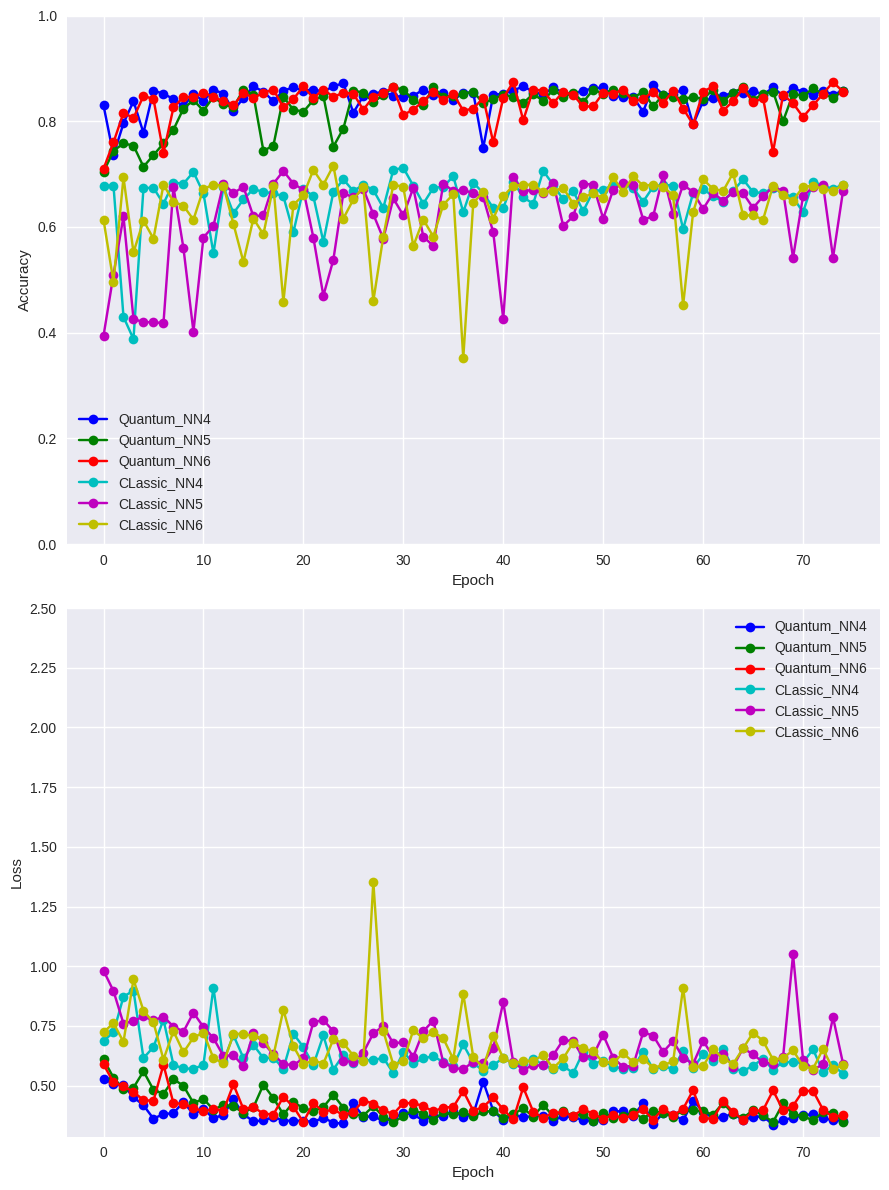

In [ ]:
NN_history_ang_list = [q_history_NN4_ang, q_history_NN5_ang, q_history_NN6_ang, c_history_NN4, c_history_NN5, c_history_NN6]
NN_labels_ang = ["Quantum_NN4", "Quantum_NN5", "Quantum_NN6", "CLassic_NN4", "CLassic_NN5", "CLassic_NN6"]
plot_comparison_six_plots(NN_history_ang_list, NN_labels_ang)

In [ ]:
import matplotlib.pyplot as plt

def plot_comparison_four_plots(history_list, labels):
    plt.style.use("seaborn")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

    colors = ['b', 'g', 'r', 'c']  # Define colors for the plots

    # num_colors = len(history_list)
    # colors = [plt.cm.tab10(i) for i in range(num_colors)]

    for i, history in enumerate(history_list):
        ax1.plot(history.history["val_accuracy"], f"-o{colors[i]}", label=labels[i])
        ax2.plot(history.history["val_loss"], f"-o{colors[i]}", label=labels[i])

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim([0, 1])
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.set_ylabel("Loss")
    ax2.set_ylim(top=2.5)
    ax2.set_xlabel("Epoch")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_comparison([q1_history, q2_history, q3_history, c1_history, c2_history, c3_history],
#                 ["Q1", "Q2", "Q3", "C1", "C2", "C3"])


<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


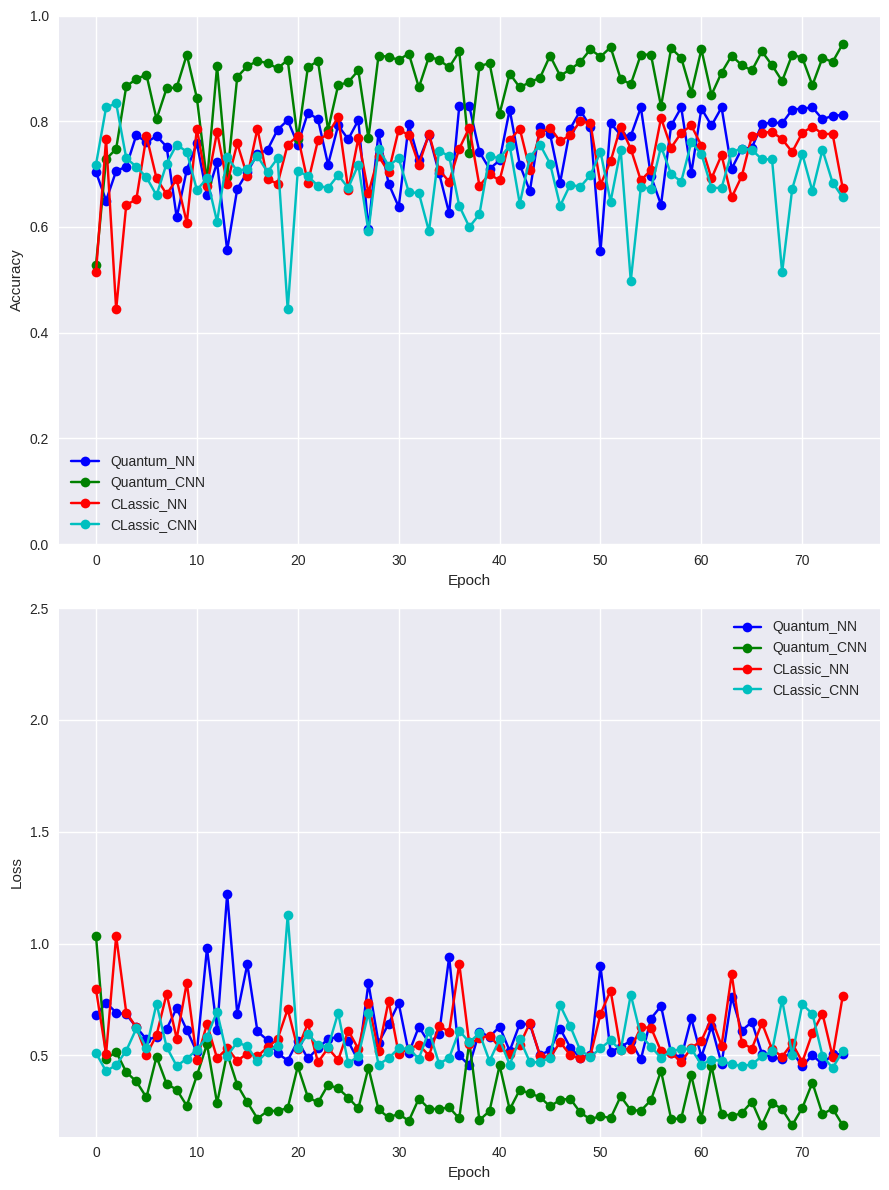

In [ ]:
NN_CNN_history_ang_list = [q_history_NN_ang, q_history_CNN_ang, c_history_NN, c_history_CNN]
NN_CNN_labels_ang = ["Quantum_NN", "Quantum_CNN", "CLassic_NN", "CLassic_CNN"]
plot_comparison_four_plots(NN_CNN_history_ang_list, NN_CNN_labels_ang)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


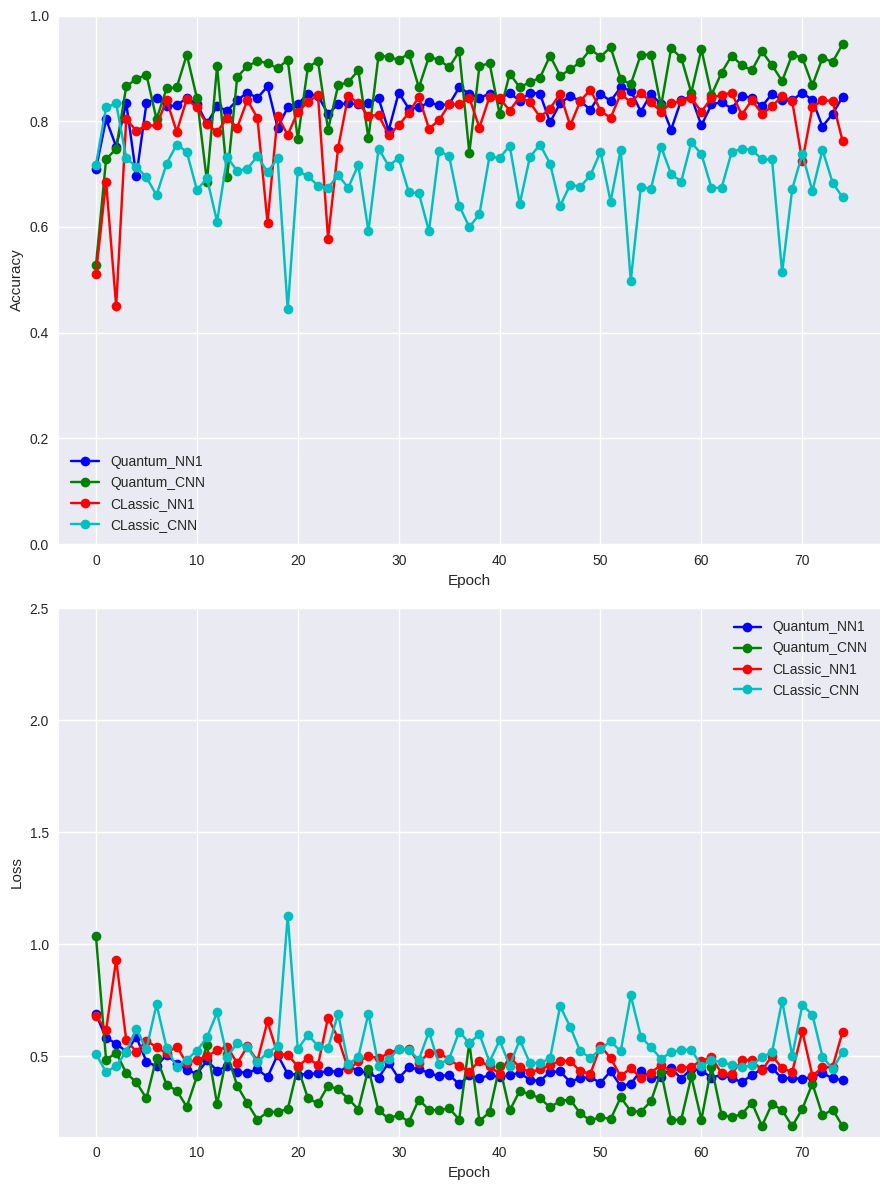

In [ ]:
NN1_CNN_history_ang_list = [q_history_NN1_ang, q_history_CNN_ang, c_history_NN1, c_history_CNN]
NN1_CNN_labels_ang = ["Quantum_NN1", "Quantum_CNN", "CLassic_NN1", "CLassic_CNN"]
plot_comparison_four_plots(NN1_CNN_history_ang_list, NN1_CNN_labels_ang)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


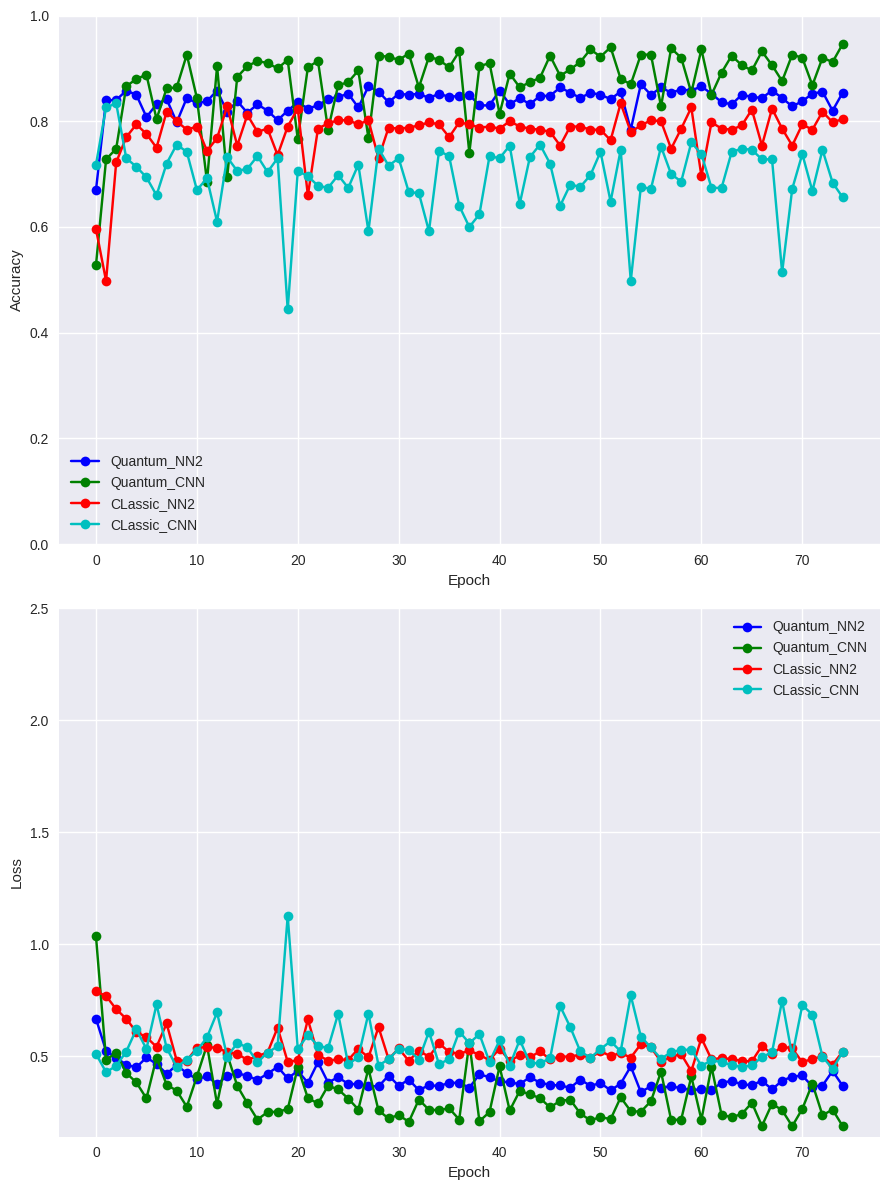

In [ ]:
NN2_CNN_history_ang_list = [q_history_NN2_ang, q_history_CNN_ang, c_history_NN2, c_history_CNN]
NN2_CNN_labels_ang = ["Quantum_NN2", "Quantum_CNN", "CLassic_NN2", "CLassic_CNN"]
plot_comparison_four_plots(NN2_CNN_history_ang_list, NN2_CNN_labels_ang)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


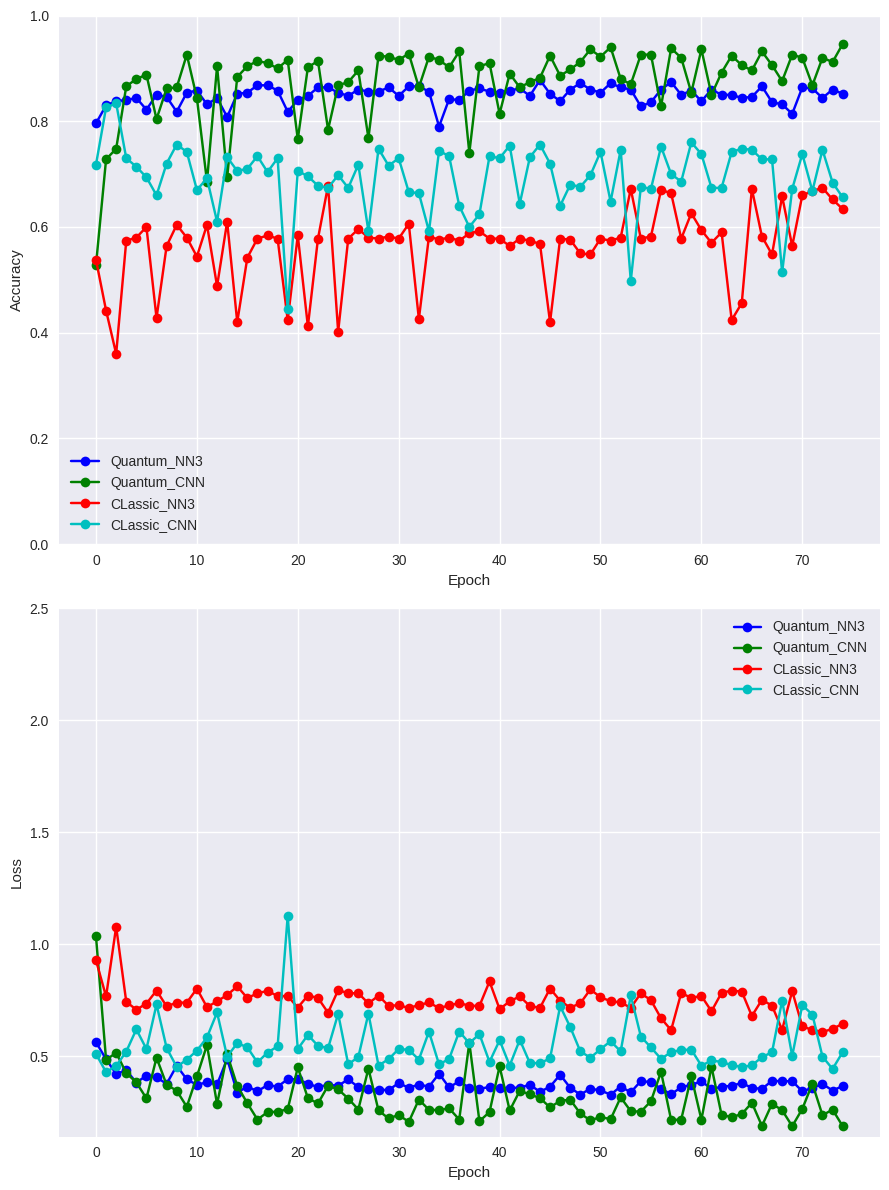

In [ ]:
NN3_CNN_history_ang_list = [q_history_NN3_ang, q_history_CNN_ang, c_history_NN3, c_history_CNN]
NN3_CNN_labels_ang = ["Quantum_NN3", "Quantum_CNN", "CLassic_NN3", "CLassic_CNN"]
plot_comparison_four_plots(NN3_CNN_history_ang_list, NN3_CNN_labels_ang)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


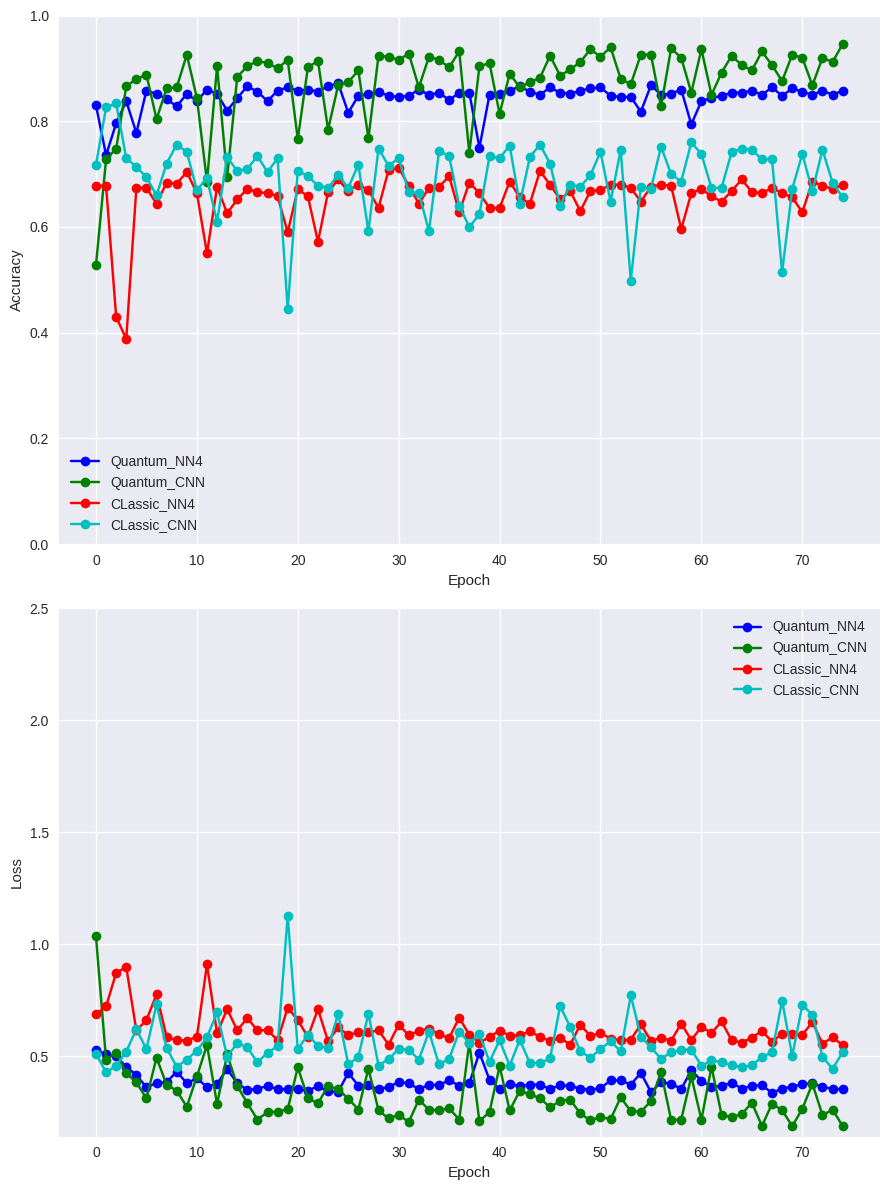

In [ ]:
NN4_CNN_history_ang_list = [q_history_NN4_ang, q_history_CNN_ang, c_history_NN4, c_history_CNN]
NN4_CNN_labels_ang = ["Quantum_NN4", "Quantum_CNN", "CLassic_NN4", "CLassic_CNN"]
plot_comparison_four_plots(NN4_CNN_history_ang_list, NN4_CNN_labels_ang)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


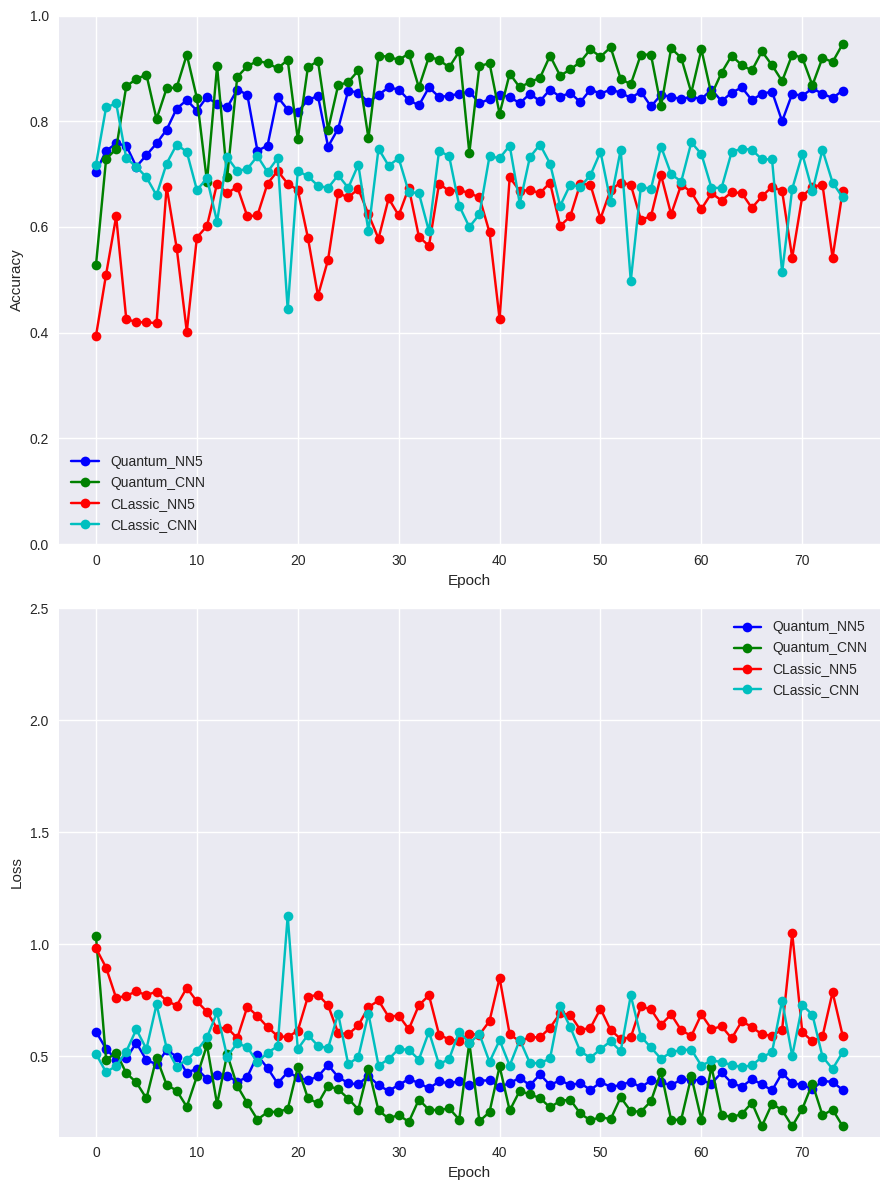

In [ ]:
NN5_CNN_history_ang_list = [q_history_NN5_ang, q_history_CNN_ang, c_history_NN5, c_history_CNN]
NN5_CNN_labels_ang = ["Quantum_NN5", "Quantum_CNN", "CLassic_NN5", "CLassic_CNN"]
plot_comparison_four_plots(NN5_CNN_history_ang_list, NN5_CNN_labels_ang)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


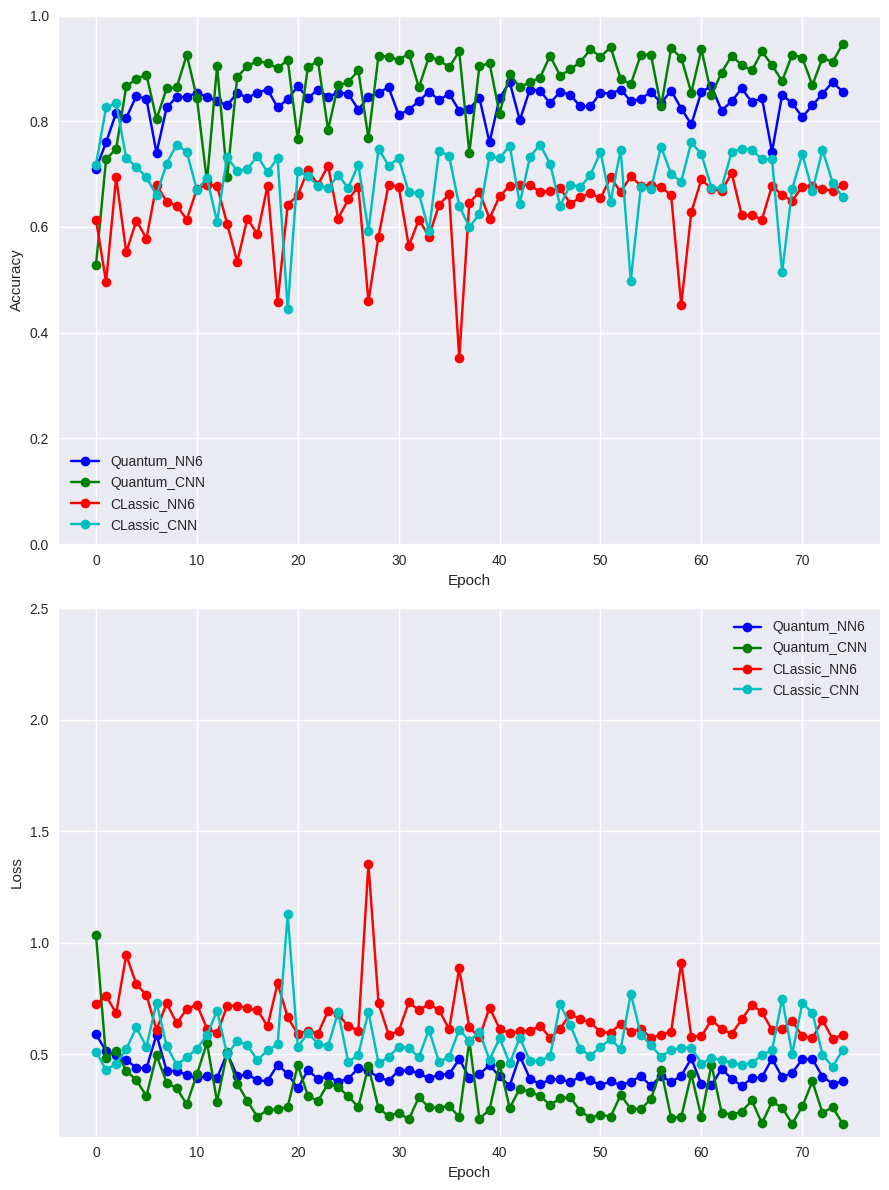

In [ ]:
NN6_CNN_history_ang_list = [q_history_NN6_ang, q_history_CNN_ang, c_history_NN6, c_history_CNN]
NN6_CNN_labels_ang = ["Quantum_NN6", "Quantum_CNN", "CLassic_NN6", "CLassic_CNN"]
plot_comparison_four_plots(NN6_CNN_history_ang_list, NN6_CNN_labels_ang)

#Graphs_amp


<ipython-input-173-c03785b5bf4d>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


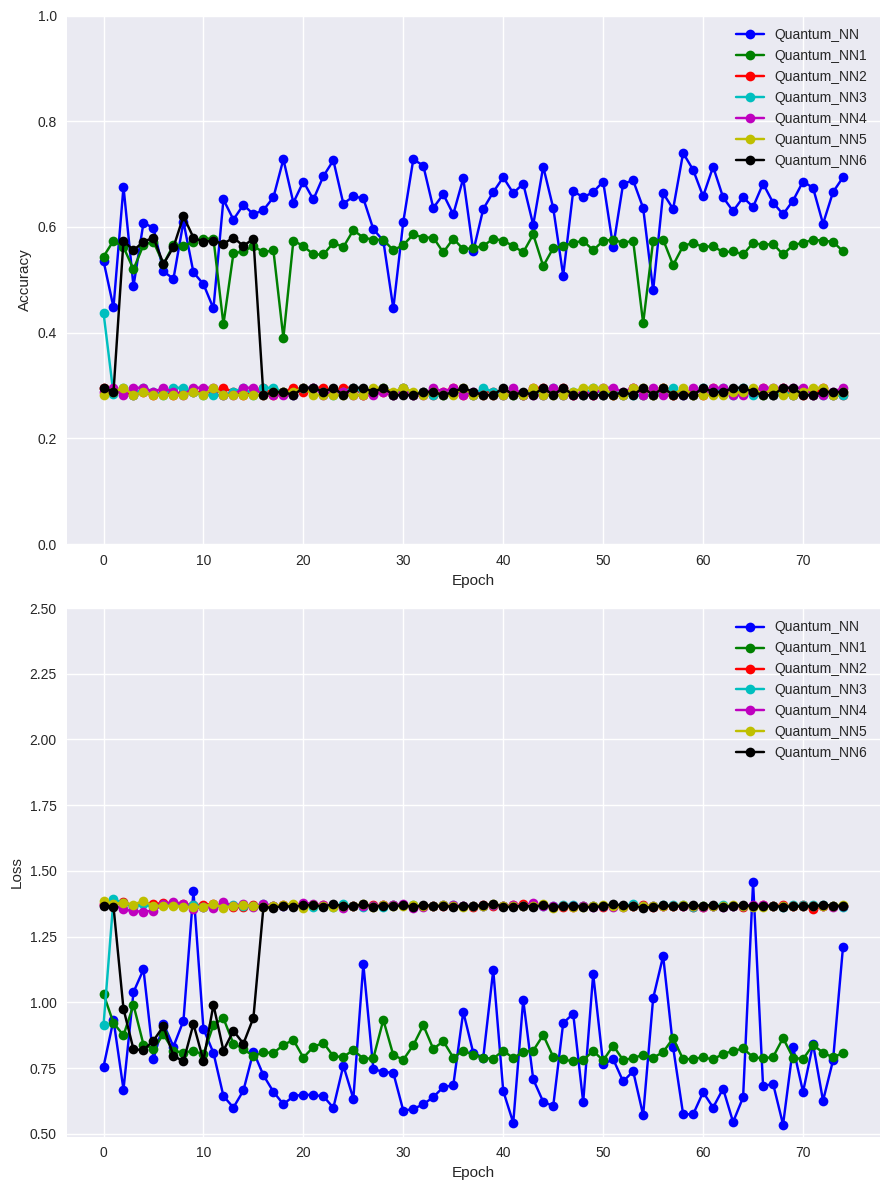

In [ ]:
Q_NN_history_amp_list = [q_history_NN_amp, q_history_NN1_amp, q_history_NN2_amp, q_history_NN3_amp, q_history_NN4_amp, q_history_NN5_amp, q_history_NN6_amp]
Q_NN_labels_amp = ["Quantum_NN", "Quantum_NN1", "Quantum_NN2", "Quantum_NN3", "Quantum_NN4", "Quantum_NN5", "Quantum_NN6"]
plot_comparison_seven_plots(Q_NN_history_amp_list, Q_NN_labels_amp)

<ipython-input-163-a682f2579368>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


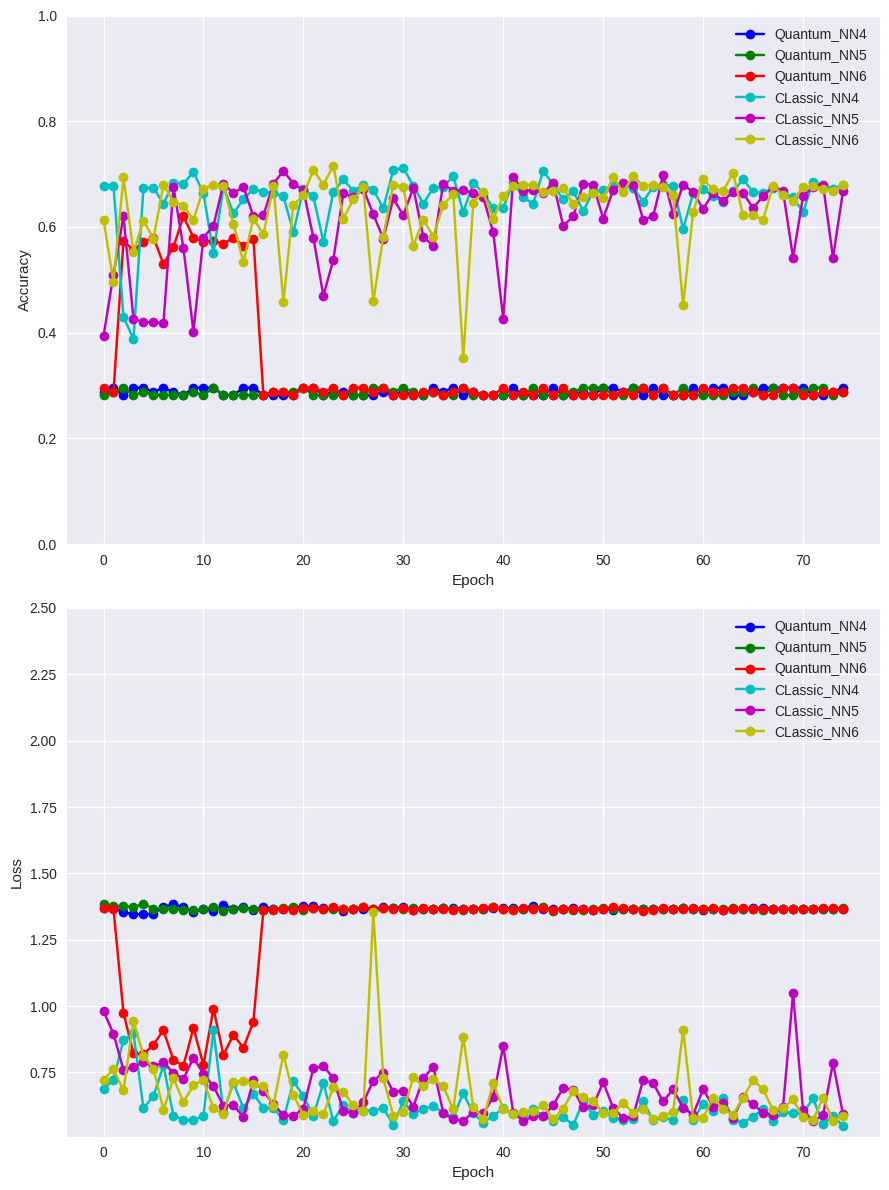

In [ ]:
NN_history_amp_list = [q_history_NN4_amp, q_history_NN5_amp, q_history_NN6_amp, c_history_NN4, c_history_NN5, c_history_NN6]
NN_labels_amp = ["Quantum_NN4", "Quantum_NN5", "Quantum_NN6", "CLassic_NN4", "CLassic_NN5", "CLassic_NN6"]
plot_comparison_six_plots(NN_history_amp_list, NN_labels_amp)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


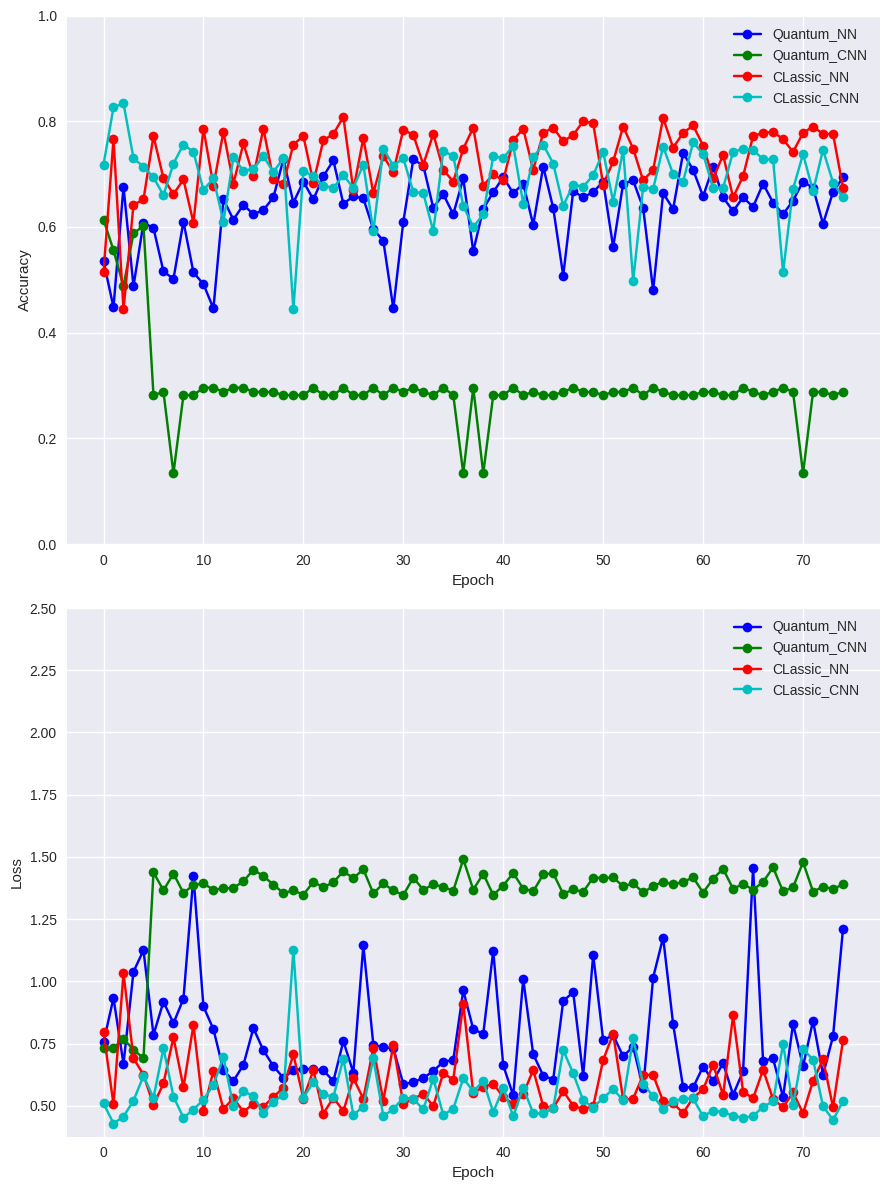

In [ ]:
NN_CNN_history_amp_list = [q_history_NN_amp, q_history_CNN_amp, c_history_NN, c_history_CNN]
NN_CNN_labels_amp = ["Quantum_NN", "Quantum_CNN", "CLassic_NN", "CLassic_CNN"]
plot_comparison_four_plots(NN_CNN_history_amp_list, NN_CNN_labels_amp)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


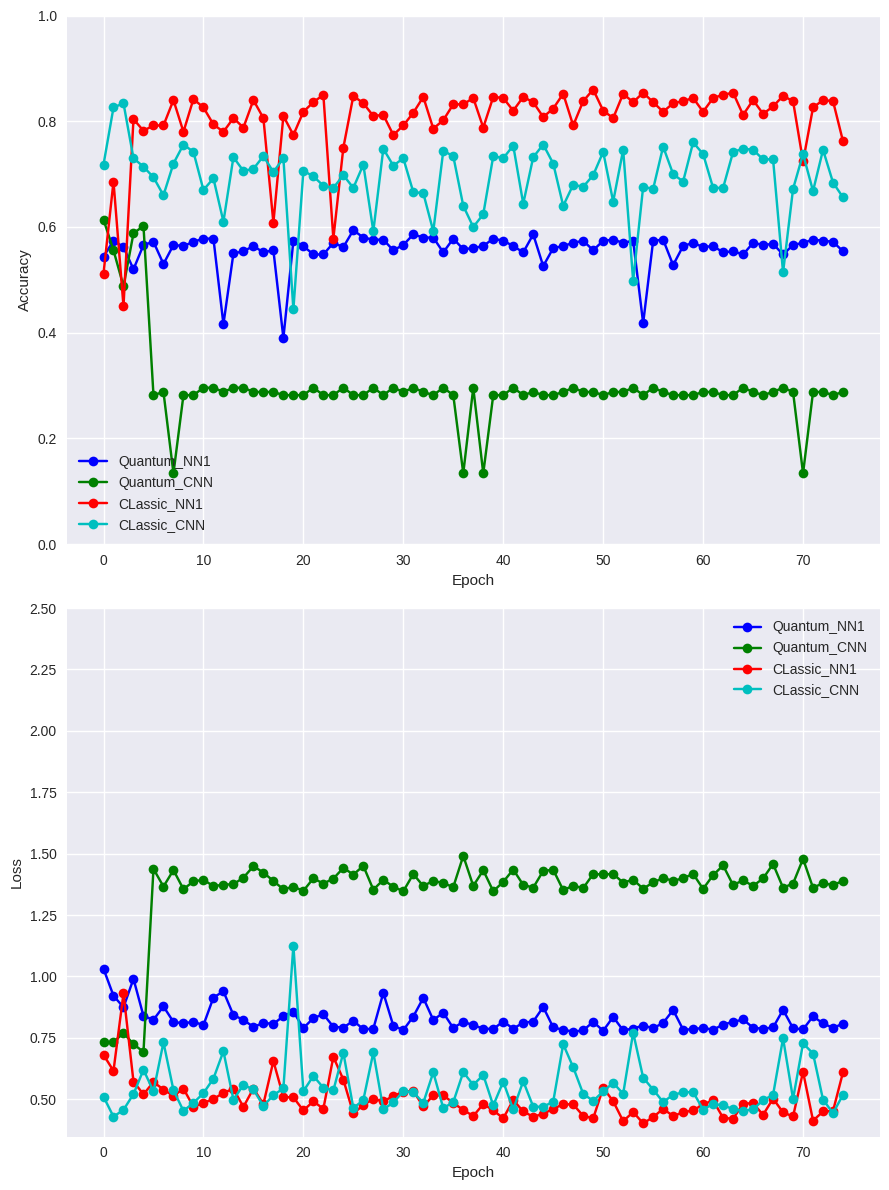

In [ ]:
NN1_CNN_history_amp_list = [q_history_NN1_amp, q_history_CNN_amp, c_history_NN1, c_history_CNN]
NN1_CNN_labels_amp = ["Quantum_NN1", "Quantum_CNN", "CLassic_NN1", "CLassic_CNN"]
plot_comparison_four_plots(NN1_CNN_history_amp_list, NN1_CNN_labels_amp)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


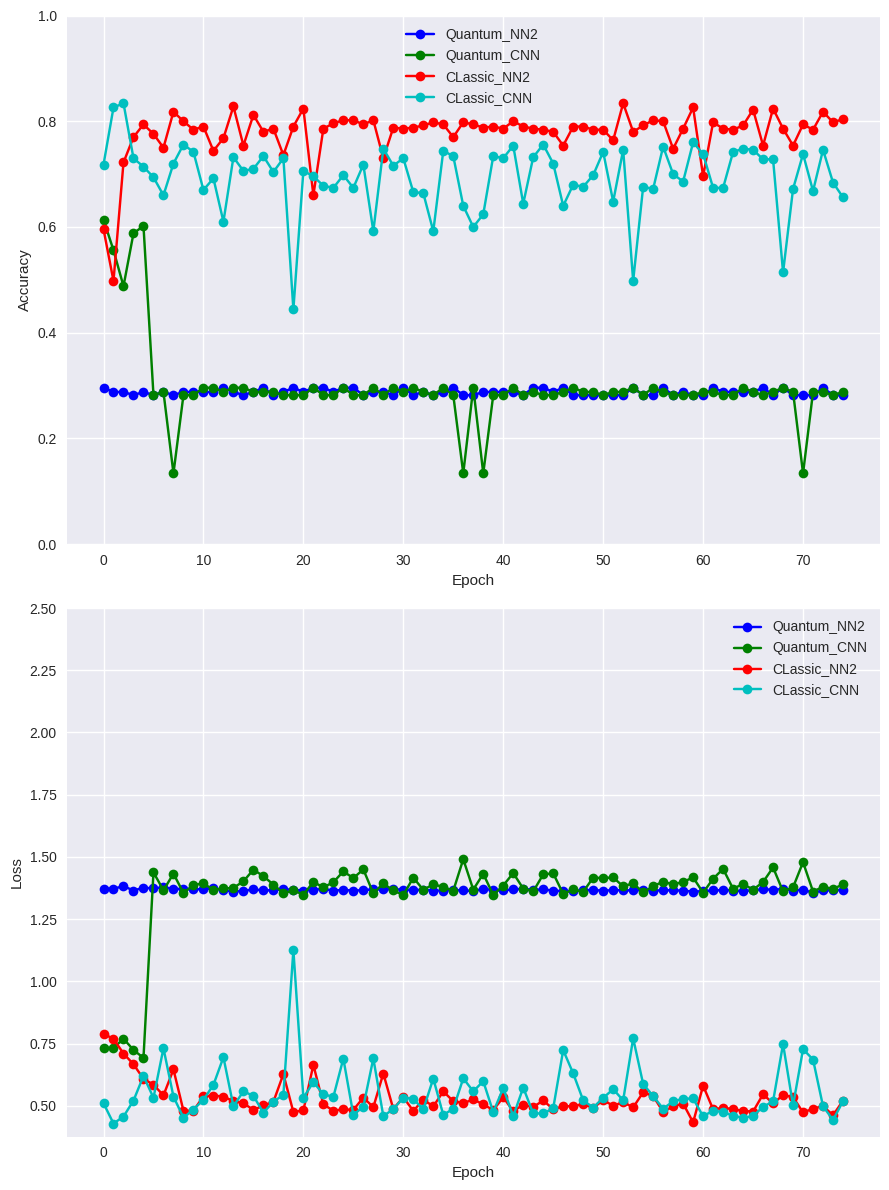

In [ ]:
NN2_CNN_history_amp_list = [q_history_NN2_amp, q_history_CNN_amp, c_history_NN2, c_history_CNN]
NN2_CNN_labels_amp = ["Quantum_NN2", "Quantum_CNN", "CLassic_NN2", "CLassic_CNN"]
plot_comparison_four_plots(NN2_CNN_history_amp_list, NN2_CNN_labels_amp)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


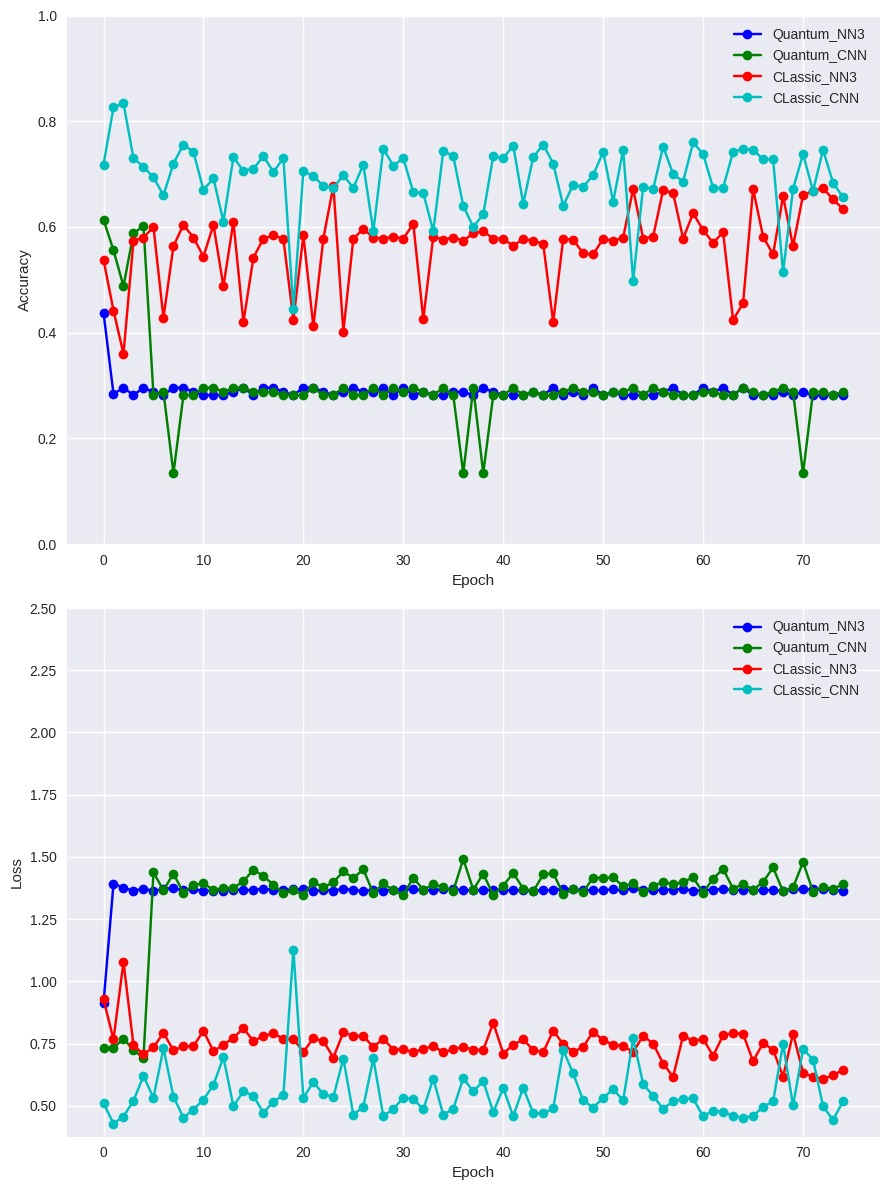

In [ ]:
NN3_CNN_history_amp_list = [q_history_NN3_amp, q_history_CNN_amp, c_history_NN3, c_history_CNN]
NN3_CNN_labels_amp = ["Quantum_NN3", "Quantum_CNN", "CLassic_NN3", "CLassic_CNN"]
plot_comparison_four_plots(NN3_CNN_history_amp_list, NN3_CNN_labels_amp)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


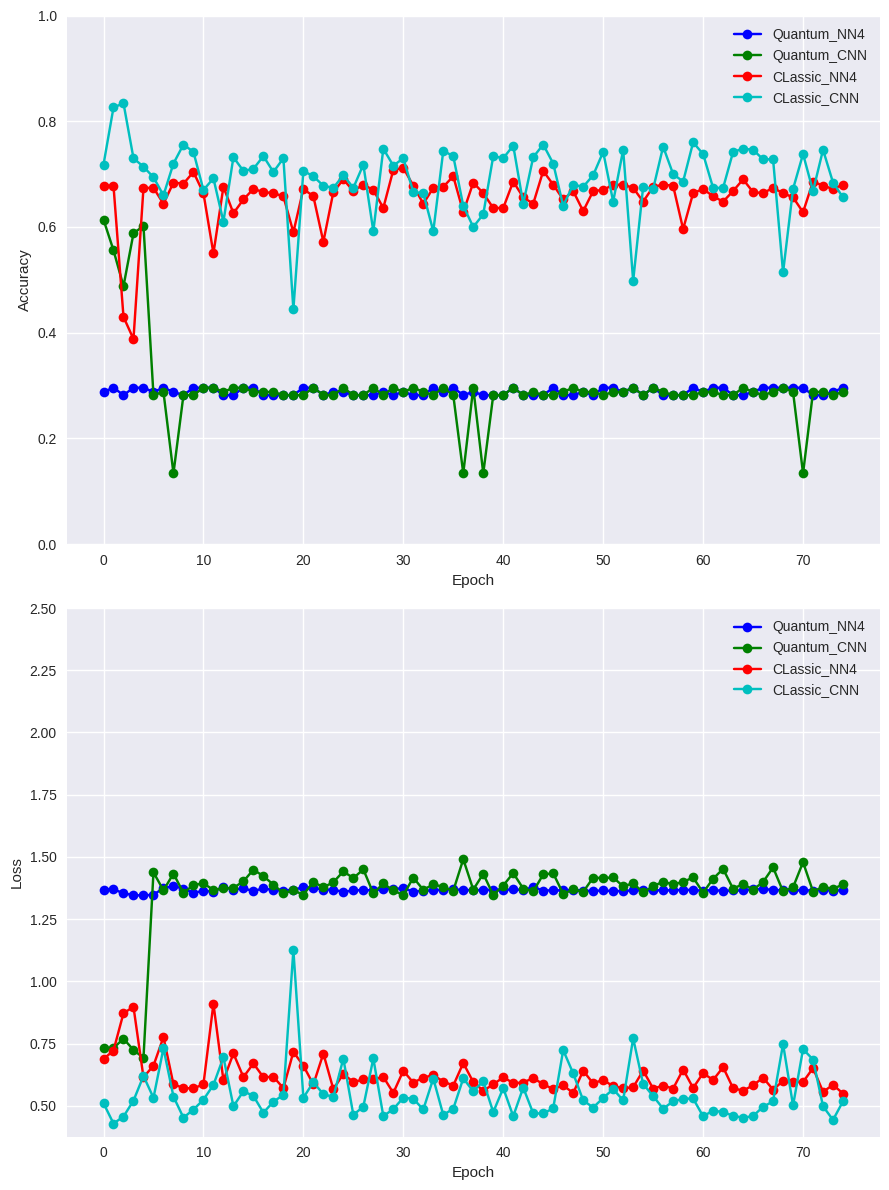

In [ ]:
NN4_CNN_history_amp_list = [q_history_NN4_amp, q_history_CNN_amp, c_history_NN4, c_history_CNN]
NN4_CNN_labels_amp = ["Quantum_NN4", "Quantum_CNN", "CLassic_NN4", "CLassic_CNN"]
plot_comparison_four_plots(NN4_CNN_history_amp_list, NN4_CNN_labels_amp)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


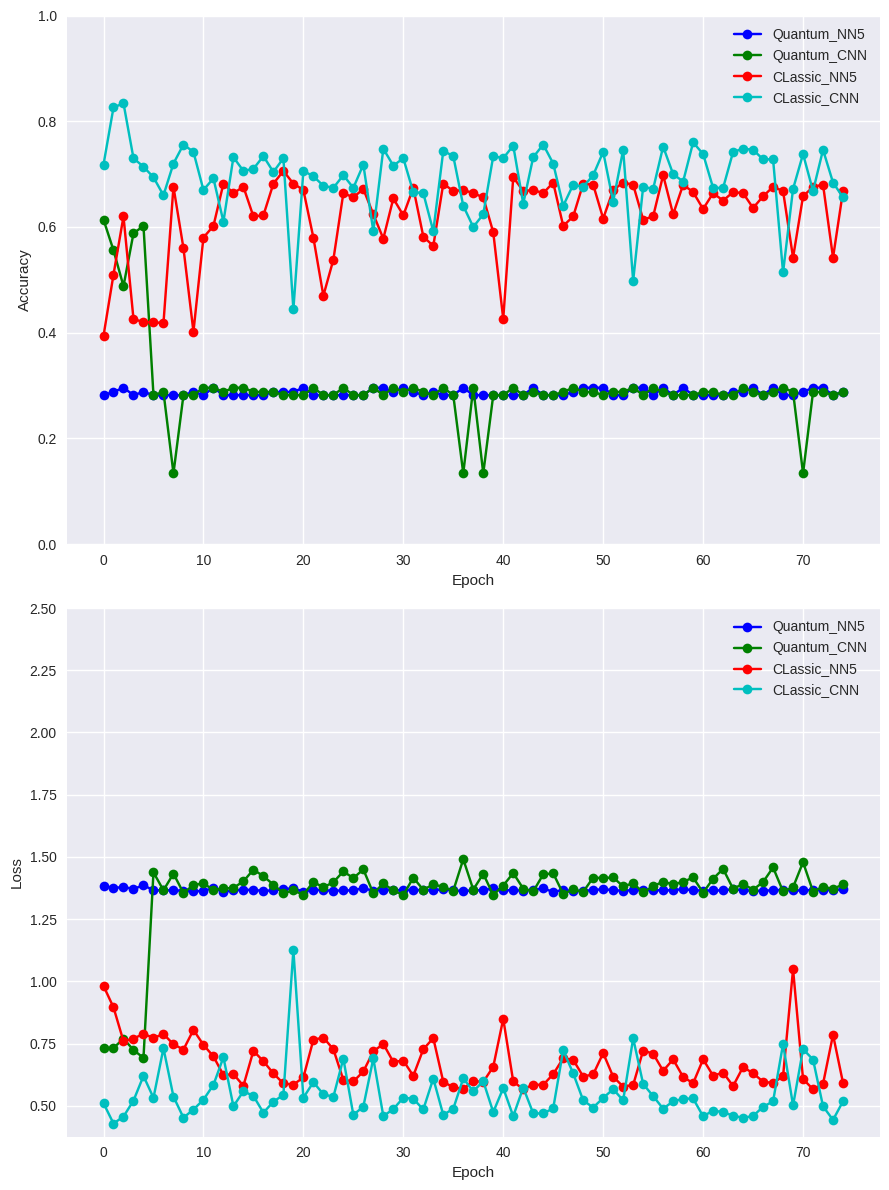

In [ ]:
NN5_CNN_history_amp_list = [q_history_NN5_amp, q_history_CNN_amp, c_history_NN5, c_history_CNN]
NN5_CNN_labels_amp = ["Quantum_NN5", "Quantum_CNN", "CLassic_NN5", "CLassic_CNN"]
plot_comparison_four_plots(NN5_CNN_history_amp_list, NN5_CNN_labels_amp)

<ipython-input-165-1c03ac6196d0>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


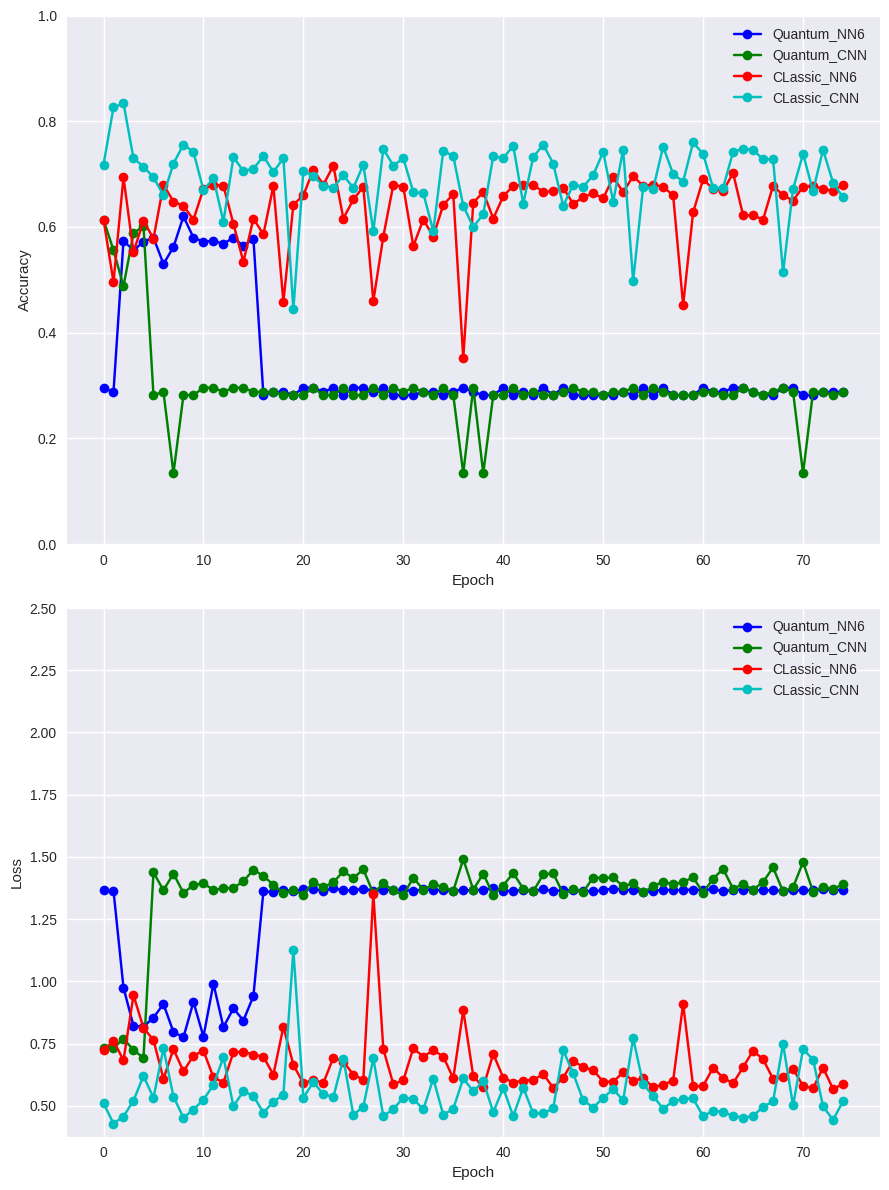

In [ ]:
NN6_CNN_history_amp_list = [q_history_NN6_amp, q_history_CNN_amp, c_history_NN6, c_history_CNN]
NN6_CNN_labels_amp = ["Quantum_NN6", "Quantum_CNN", "CLassic_NN6", "CLassic_CNN"]
plot_comparison_four_plots(NN6_CNN_history_amp_list, NN6_CNN_labels_amp)